<a href="https://colab.research.google.com/github/Saket22-CS/UIDAI_Hackathon/blob/main/UIDAI_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 1. **Setup & Installation**

In [ ]:
# Install required libraries
!pip install prophet plotly geopandas seaborn kaleido scikit-learn --quiet

print("✅ All libraries installed successfully!")

✅ All libraries installed successfully!


2. **Import Libraries**

In [ ]:
# Core Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Time Series
from prophet import Prophet

# Utilities
import os
from datetime import datetime, timedelta

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print(f"📅 Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ All libraries imported successfully!
📅 Analysis Date: 2026-01-17 14:28:47


3. Create Output Directory Structure

In [ ]:
# Create organized folder structure
folders = ['visuals', 'visuals/univariate', 'visuals/bivariate',
           'visuals/trivariate', 'visuals/forecasting', 'visuals/clustering',
           'visuals/advanced', 'exports']

for folder in folders:
    os.makedirs(folder, exist_ok=True)

print("✅ Output directories created:")
for folder in folders:
    print(f"   📂 {folder}")

✅ Output directories created:
   📂 visuals
   📂 visuals/univariate
   📂 visuals/bivariate
   📂 visuals/trivariate
   📂 visuals/forecasting
   📂 visuals/clustering
   📂 visuals/advanced
   📂 exports


4. Data Loading & Validation

In [ ]:
# Load datasets
print("🔄 Loading datasets...")

enrol = pd.read_csv('/content/enrolment.csv')
demo = pd.read_csv('/content/demographic_update.csv')
bio = pd.read_csv('/content/biometric_update.csv')

print("\n✅ Datasets loaded successfully!\n")
print("="*60)
print("📈 DATASET OVERVIEW")
print("="*60)
print(f"Enrolment Data:        {enrol.shape[0]:,} rows × {enrol.shape[1]} columns")
print(f"Demographic Updates:   {demo.shape[0]:,} rows × {demo.shape[1]} columns")
print(f"Biometric Updates:     {bio.shape[0]:,} rows × {bio.shape[1]} columns")
print(f"\nTotal Records:         {enrol.shape[0] + demo.shape[0] + bio.shape[0]:,}")
print("="*60)

# Display column names
print("\n📋 COLUMN VERIFICATION:")
print(f"\nEnrolment columns: {list(enrol.columns)}")
print(f"\nDemographic columns: {list(demo.columns)}")
print(f"\nBiometric columns: {list(bio.columns)}")

🔄 Loading datasets...

✅ Datasets loaded successfully!

📈 DATASET OVERVIEW
Enrolment Data:        500,000 rows × 7 columns
Demographic Updates:   500,000 rows × 6 columns
Biometric Updates:     500,000 rows × 6 columns

Total Records:         1,500,000

📋 COLUMN VERIFICATION:

Enrolment columns: ['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater']

Demographic columns: ['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_']

Biometric columns: ['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']


5. Data Quality Check

In [ ]:
print("\n" + "="*70)
print("🔍 DATA QUALITY ASSESSMENT")
print("="*70)

# Check for missing values
print("\n📊 MISSING VALUES:")
print("\nEnrolment:")
print(enrol.isnull().sum())

print("\nDemographic:")
print(demo.isnull().sum())

print("\nBiometric:")
print(bio.isnull().sum())

# Check for duplicates
print("\n📊 DUPLICATE ROWS:")
print(f"Enrolment:   {enrol.duplicated().sum():,} duplicates")
print(f"Demographic: {demo.duplicated().sum():,} duplicates")
print(f"Biometric:   {bio.duplicated().sum():,} duplicates")


🔍 DATA QUALITY ASSESSMENT

📊 MISSING VALUES:

Enrolment:
date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

Demographic:
date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
dtype: int64

Biometric:
date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

📊 DUPLICATE ROWS:
Enrolment:   6,036 duplicates
Demographic: 0 duplicates
Biometric:   10,318 duplicates


 6. Data Preprocessing

In [ ]:
print("🔄 Starting data preprocessing...\n")

# Store original counts
orig_enrol = len(enrol)
orig_demo = len(demo)
orig_bio = len(bio)

# Remove duplicates
enrol = enrol.drop_duplicates()
demo = demo.drop_duplicates()
bio = bio.drop_duplicates()

# Handle missing values (drop rows with any missing values)
enrol = enrol.dropna()
demo = demo.dropna()
bio = bio.dropna()

# Standardize column names (lowercase and strip whitespace)
enrol.columns = enrol.columns.str.lower().str.strip()
demo.columns = demo.columns.str.lower().str.strip()
bio.columns = bio.columns.str.lower().str.strip()

print("✅ Data Cleaning Summary:")
print(f"   Enrolment:   {orig_enrol:,} → {len(enrol):,} ({orig_enrol-len(enrol):,} removed)")
print(f"   Demographic: {orig_demo:,} → {len(demo):,} ({orig_demo-len(demo):,} removed)")
print(f"   Biometric:   {orig_bio:,} → {len(bio):,} ({orig_bio-len(bio):,} removed)")

# Verify column names after cleaning
print("\n📋 Cleaned Column Names:")
print(f"Enrolment:   {list(enrol.columns)}")
print(f"Demographic: {list(demo.columns)}")
print(f"Biometric:   {list(bio.columns)}")

🔄 Starting data preprocessing...

✅ Data Cleaning Summary:
   Enrolment:   500,000 → 493,964 (6,036 removed)
   Demographic: 500,000 → 500,000 (0 removed)
   Biometric:   500,000 → 489,682 (10,318 removed)

📋 Cleaned Column Names:
Enrolment:   ['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater']
Demographic: ['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_']
Biometric:   ['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']


7. Date Processing & Feature Engineering

In [ ]:
print("\n🔄 Processing date columns and creating time features...\n")

# Convert date columns to datetime
enrol['date'] = pd.to_datetime(enrol['date'], errors='coerce')
demo['date'] = pd.to_datetime(demo['date'], errors='coerce')
bio['date'] = pd.to_datetime(bio['date'], errors='coerce')

# Create time-based features for each dataset
for df, name in [(enrol, 'Enrolment'), (demo, 'Demographic'), (bio, 'Biometric')]:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['quarter'] = df['date'].dt.quarter
    df['day_of_week'] = df['date'].dt.dayofweek
    df['week_of_year'] = df['date'].dt.isocalendar().week
    df['month_name'] = df['date'].dt.month_name()
    df['quarter_name'] = 'Q' + df['quarter'].astype(str)

    print(f"✅ {name}: Date features created")
    print(f"   Date range: {df['date'].min()} to {df['date'].max()}")

# Create age group totals for easier analysis
print("\n🔄 Creating aggregated age columns...")

enrol['total_enrolment'] = enrol['age_0_5'] + enrol['age_5_17'] + enrol['age_18_greater']
demo['total_updates'] = demo['demo_age_5_17'] + demo['demo_age_17_']
bio['total_updates'] = bio['bio_age_5_17'] + bio['bio_age_17_']

print("✅ Age aggregation complete")
print(f"   Enrolment: Created 'total_enrolment' column")
print(f"   Demographic: Created 'total_updates' column")
print(f"   Biometric: Created 'total_updates' column")


🔄 Processing date columns and creating time features...

✅ Enrolment: Date features created
   Date range: 2025-01-04 00:00:00 to 2025-12-09 00:00:00
✅ Demographic: Date features created
   Date range: 2025-03-01 00:00:00 to 2025-12-29 00:00:00
✅ Biometric: Date features created
   Date range: 2025-01-03 00:00:00 to 2025-12-09 00:00:00

🔄 Creating aggregated age columns...
✅ Age aggregation complete
   Enrolment: Created 'total_enrolment' column
   Demographic: Created 'total_updates' column
   Biometric: Created 'total_updates' column


8. Exploratory Data Analysis

In [ ]:
print("\n" + "="*70)
print("📋 SAMPLE DATA PREVIEW (First 5 rows)")
print("="*70)

print("\n🔹 Enrolment Data:")
display(enrol.head())

print("\n🔹 Demographic Updates:")
display(demo.head())

print("\n🔹 Biometric Updates:")
display(bio.head())


📋 SAMPLE DATA PREVIEW (First 5 rows)

🔹 Enrolment Data:


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,year,month,quarter,day_of_week,week_of_year,month_name,quarter_name,total_enrolment
0,2025-02-03,Meghalaya,East Khasi Hills,793121,11,61,37,2025.0,2.0,1.0,0.0,6,February,Q1.0,109
1,2025-09-03,Karnataka,Bengaluru Urban,560043,14,33,39,2025.0,9.0,3.0,2.0,36,September,Q3.0,86
2,2025-09-03,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,2025.0,9.0,3.0,2.0,36,September,Q3.0,123
3,2025-09-03,Uttar Pradesh,Aligarh,202133,62,29,15,2025.0,9.0,3.0,2.0,36,September,Q3.0,106
4,2025-09-03,Karnataka,Bengaluru Urban,560016,14,16,21,2025.0,9.0,3.0,2.0,36,September,Q3.0,51



🔹 Demographic Updates:


,date,state,district,pincode,demo_age_5_17,demo_age_17_,year,month,quarter,day_of_week,week_of_year,month_name,quarter_name,total_updates
0,2025-09-19,Maharashtra,Satara,415517,0,2,2025,9,3,4,38,September,Q3,2
1,2025-09-19,Maharashtra,Satara,415518,0,2,2025,9,3,4,38,September,Q3,2
2,2025-09-19,Maharashtra,Satara,415520,0,3,2025,9,3,4,38,September,Q3,3
3,2025-09-19,Maharashtra,Satara,415539,1,5,2025,9,3,4,38,September,Q3,6
4,2025-09-19,Maharashtra,Sindhudurg,416510,4,37,2025,9,3,4,38,September,Q3,41



🔹 Biometric Updates:


,date,state,district,pincode,bio_age_5_17,bio_age_17_,year,month,quarter,day_of_week,week_of_year,month_name,quarter_name,total_updates
0,2025-01-03,Haryana,Mahendragarh,123029,280,577,2025.0,1.0,1.0,4.0,1,January,Q1.0,857
1,2025-01-03,Bihar,Madhepura,852121,144,369,2025.0,1.0,1.0,4.0,1,January,Q1.0,513
2,2025-01-03,Jammu and Kashmir,Punch,185101,643,1091,2025.0,1.0,1.0,4.0,1,January,Q1.0,1734
3,2025-01-03,Bihar,Bhojpur,802158,256,980,2025.0,1.0,1.0,4.0,1,January,Q1.0,1236
4,2025-01-03,Tamil Nadu,Madurai,625514,271,815,2025.0,1.0,1.0,4.0,1,January,Q1.0,1086


9. Statistical Summary

In [ ]:
print("\n" + "="*70)
print("📊 STATISTICAL SUMMARY")
print("="*70)

print("\n🔹 Enrolment Statistics:")
display(enrol[['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrolment']].describe())

print("\n🔹 Demographic Update Statistics:")
display(demo[['demo_age_5_17', 'demo_age_17_', 'total_updates']].describe())

print("\n🔹 Biometric Update Statistics:")
display(bio[['bio_age_5_17', 'bio_age_17_', 'total_updates']].describe())


📊 STATISTICAL SUMMARY

🔹 Enrolment Statistics:


,age_0_5,age_5_17,age_18_greater,total_enrolment
count,493964.000000,493964.000000,493964.000000,493964.000000
mean,4.052030,2.327807,0.247680,6.627517
std,24.559736,20.311225,4.464724,44.572149
min,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000
50%,2.000000,0.000000,0.000000,2.000000
75%,3.000000,1.000000,0.000000,5.000000
max,2688.000000,1812.000000,855.000000,3965.000000



🔹 Demographic Update Statistics:


,demo_age_5_17,demo_age_17_,total_updates
count,500000.000000,500000.000000,500000.000000
mean,2.173678,20.225288,22.398966
std,12.194431,110.928146,121.503405
min,0.000000,0.000000,0.000000
25%,0.000000,2.000000,3.000000
50%,1.000000,6.000000,6.000000
75%,2.000000,15.000000,17.000000
max,1084.000000,16166.000000,16942.000000



🔹 Biometric Update Statistics:


,bio_age_5_17,bio_age_17_,total_updates
count,489682.000000,489682.000000,489682.000000
mean,47.847934,51.370677,99.218611
std,157.534164,165.971424,305.122737
min,0.000000,0.000000,0.000000
25%,1.000000,2.000000,3.000000
50%,5.000000,6.000000,11.000000
75%,26.000000,24.000000,53.000000
max,8002.000000,7625.000000,13381.000000


10. **UNIVARIATE ANALYSIS**

10.1 Yearly Enrolment Trends

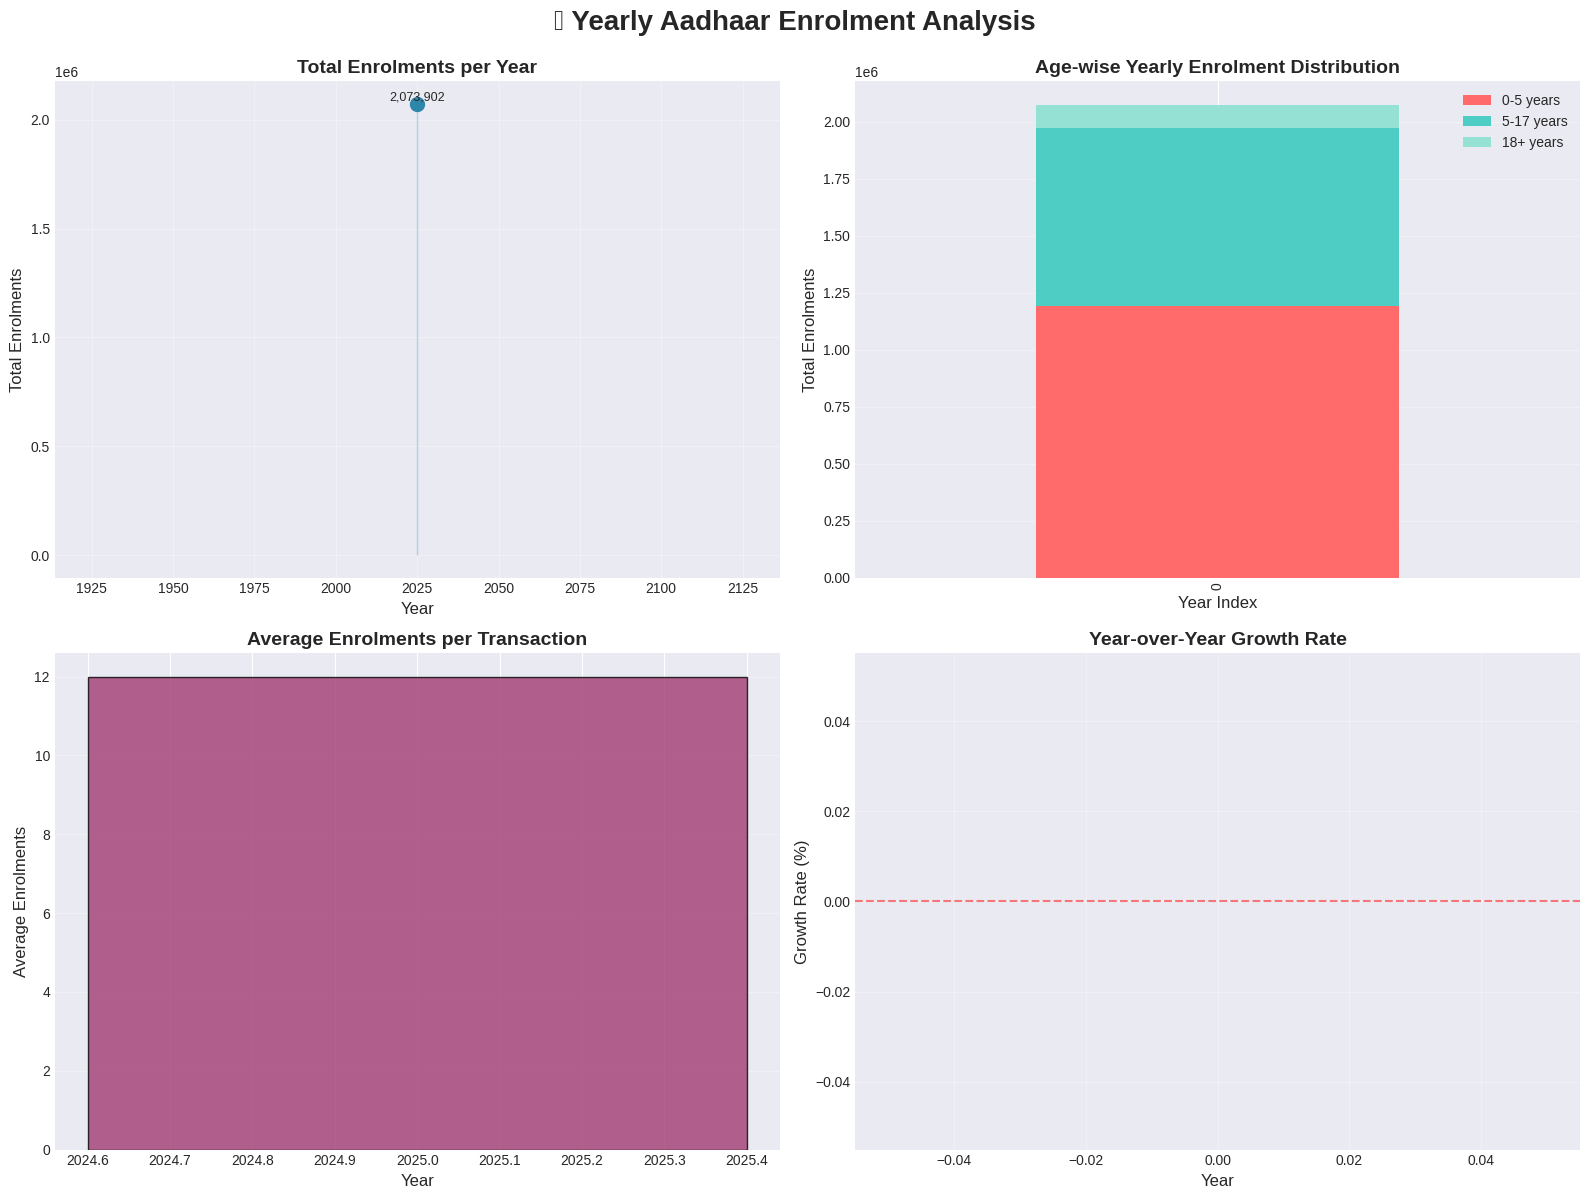


📊 Yearly Enrolment Summary:


,year,Total,Average,Transactions,Age_0_5,Age_5_17,Age_18_Greater,Growth_Rate
0,2025.0,2073902,11.99,172930,1191770,778958,103174,NaN


In [ ]:
# Aggregate yearly enrolment data
yearly_enrol = enrol.groupby('year').agg({
    'total_enrolment': ['sum', 'mean', 'count'],
    'age_0_5': 'sum',
    'age_5_17': 'sum',
    'age_18_greater': 'sum'
}).round(2)

yearly_enrol.columns = ['Total', 'Average', 'Transactions', 'Age_0_5', 'Age_5_17', 'Age_18_Greater']
yearly_enrol = yearly_enrol.reset_index()

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📈 Yearly Aadhaar Enrolment Analysis', fontsize=20, fontweight='bold', y=0.995)

# Plot 1: Total Enrolments Trend
axes[0, 0].plot(yearly_enrol['year'], yearly_enrol['Total'],
                marker='o', linewidth=3, markersize=10, color='#2E86AB')
axes[0, 0].fill_between(yearly_enrol['year'], yearly_enrol['Total'], alpha=0.3, color='#2E86AB')
axes[0, 0].set_title('Total Enrolments per Year', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year', fontsize=12)
axes[0, 0].set_ylabel('Total Enrolments', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)
for x, y in zip(yearly_enrol['year'], yearly_enrol['Total']):
    axes[0, 0].text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=9)

# Plot 2: Age-wise Distribution Stacked Bar
yearly_enrol[['Age_0_5', 'Age_5_17', 'Age_18_Greater']].plot(
    kind='bar', stacked=True, ax=axes[0, 1],
    color=['#FF6B6B', '#4ECDC4', '#95E1D3']
)
axes[0, 1].set_title('Age-wise Yearly Enrolment Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year Index', fontsize=12)
axes[0, 1].set_ylabel('Total Enrolments', fontsize=12)
axes[0, 1].legend(['0-5 years', '5-17 years', '18+ years'], fontsize=10)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: Average Enrolments per Transaction
axes[1, 0].bar(yearly_enrol['year'], yearly_enrol['Average'],
               color='#A23B72', alpha=0.8, edgecolor='black')
axes[1, 0].set_title('Average Enrolments per Transaction', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year', fontsize=12)
axes[1, 0].set_ylabel('Average Enrolments', fontsize=12)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Plot 4: Year-over-Year Growth Rate
yearly_enrol['Growth_Rate'] = yearly_enrol['Total'].pct_change() * 100
axes[1, 1].plot(yearly_enrol['year'][1:], yearly_enrol['Growth_Rate'][1:],
                marker='D', linewidth=3, markersize=10, color='#06A77D')
axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1, 1].set_title('Year-over-Year Growth Rate', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Year', fontsize=12)
axes[1, 1].set_ylabel('Growth Rate (%)', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('visuals/univariate/yearly_enrolment_comprehensive.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Yearly Enrolment Summary:")
display(yearly_enrol)

10.2 Age Group Distribution Analysis

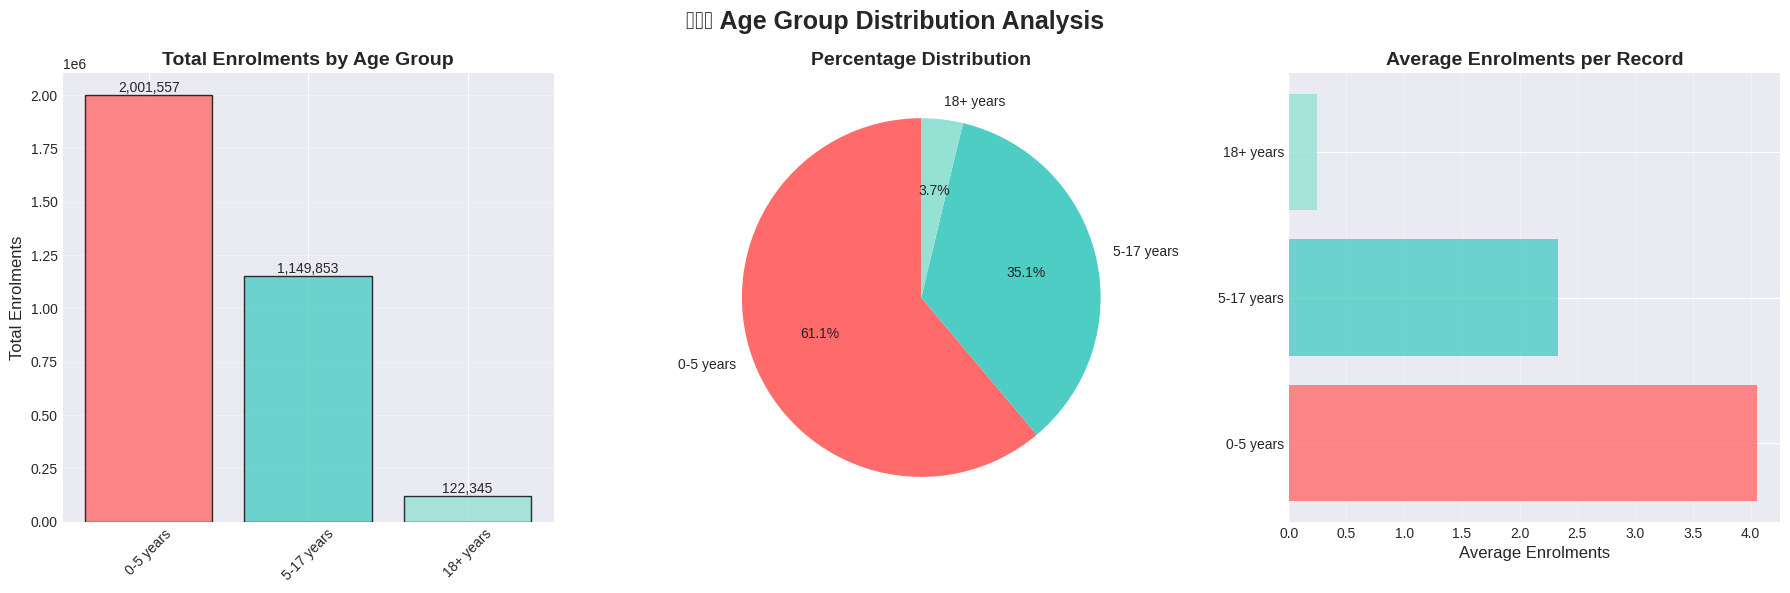


📊 Age Group Summary:
   0-5 years: 2,001,557 (61.1%)
   5-17 years: 1,149,853 (35.1%)
   18+ years: 122,345 (3.7%)


In [ ]:
# Calculate total enrolments by age group
age_totals = {
    '0-5 years': enrol['age_0_5'].sum(),
    '5-17 years': enrol['age_5_17'].sum(),
    '18+ years': enrol['age_18_greater'].sum()
}

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('👶👦🧑 Age Group Distribution Analysis', fontsize=18, fontweight='bold')

# Plot 1: Bar Chart
axes[0].bar(age_totals.keys(), age_totals.values(),
            color=['#FF6B6B', '#4ECDC4', '#95E1D3'], alpha=0.8, edgecolor='black')
axes[0].set_title('Total Enrolments by Age Group', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Total Enrolments', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')
for i, (k, v) in enumerate(age_totals.items()):
    axes[0].text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=10)

# Plot 2: Pie Chart
axes[1].pie(age_totals.values(), labels=age_totals.keys(), autopct='%1.1f%%',
            colors=['#FF6B6B', '#4ECDC4', '#95E1D3'], startangle=90)
axes[1].set_title('Percentage Distribution', fontsize=14, fontweight='bold')

# Plot 3: Horizontal Bar for Average by Age Group
avg_by_age = {
    '0-5 years': enrol['age_0_5'].mean(),
    '5-17 years': enrol['age_5_17'].mean(),
    '18+ years': enrol['age_18_greater'].mean()
}
axes[2].barh(list(avg_by_age.keys()), list(avg_by_age.values()),
             color=['#FF6B6B', '#4ECDC4', '#95E1D3'], alpha=0.8)
axes[2].set_title('Average Enrolments per Record', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Average Enrolments', fontsize=12)
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('visuals/univariate/age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Age Group Summary:")
for age, total in age_totals.items():
    percentage = (total / sum(age_totals.values())) * 100
    print(f"   {age}: {total:,} ({percentage:.1f}%)")

10.3 Monthly Enrolment Patterns

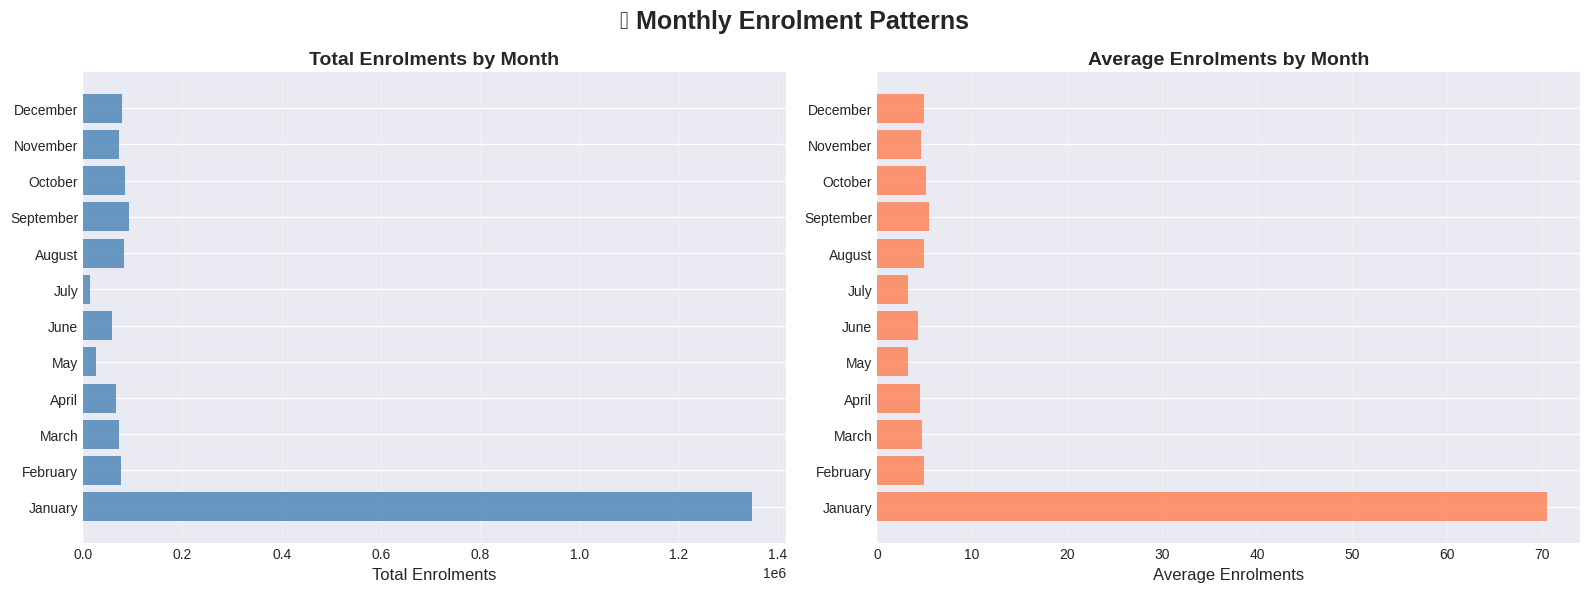

In [ ]:
# Monthly aggregation
monthly_enrol = enrol.groupby('month_name')['total_enrolment'].agg(['sum', 'mean', 'count'])
monthly_enrol = monthly_enrol.reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
monthly_enrol = monthly_enrol.dropna()

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('📅 Monthly Enrolment Patterns', fontsize=18, fontweight='bold')

# Total by month
axes[0].barh(monthly_enrol.index, monthly_enrol['sum'], color='steelblue', alpha=0.8)
axes[0].set_title('Total Enrolments by Month', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Total Enrolments', fontsize=12)
axes[0].grid(True, alpha=0.3, axis='x')

# Average by month
axes[1].barh(monthly_enrol.index, monthly_enrol['mean'], color='coral', alpha=0.8)
axes[1].set_title('Average Enrolments by Month', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Average Enrolments', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('visuals/univariate/monthly_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

10.4 Quarterly Trends

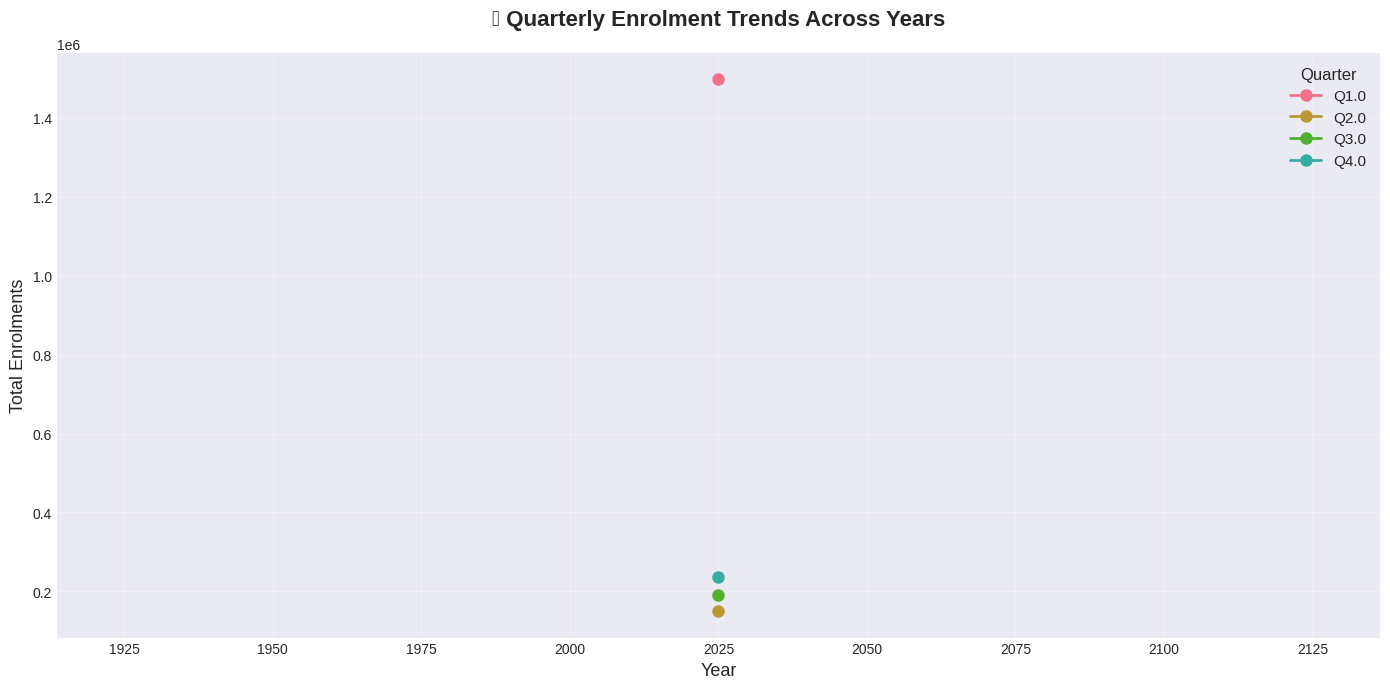

In [ ]:
# Quarterly analysis
quarterly = enrol.groupby(['year', 'quarter_name'])['total_enrolment'].sum().reset_index()

plt.figure(figsize=(14, 7))
for quarter in sorted(quarterly['quarter_name'].unique()):
    data = quarterly[quarterly['quarter_name'] == quarter]
    plt.plot(data['year'], data['total_enrolment'],
             marker='o', linewidth=2, markersize=8, label=quarter)

plt.title('📊 Quarterly Enrolment Trends Across Years', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Total Enrolments', fontsize=13)
plt.legend(title='Quarter', title_fontsize=12, fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('visuals/univariate/quarterly_trends.png', dpi=300, bbox_inches='tight')
plt.show()

11. **BIVARIATE ANALYSIS**

11.1 State-wise Enrolment Performance

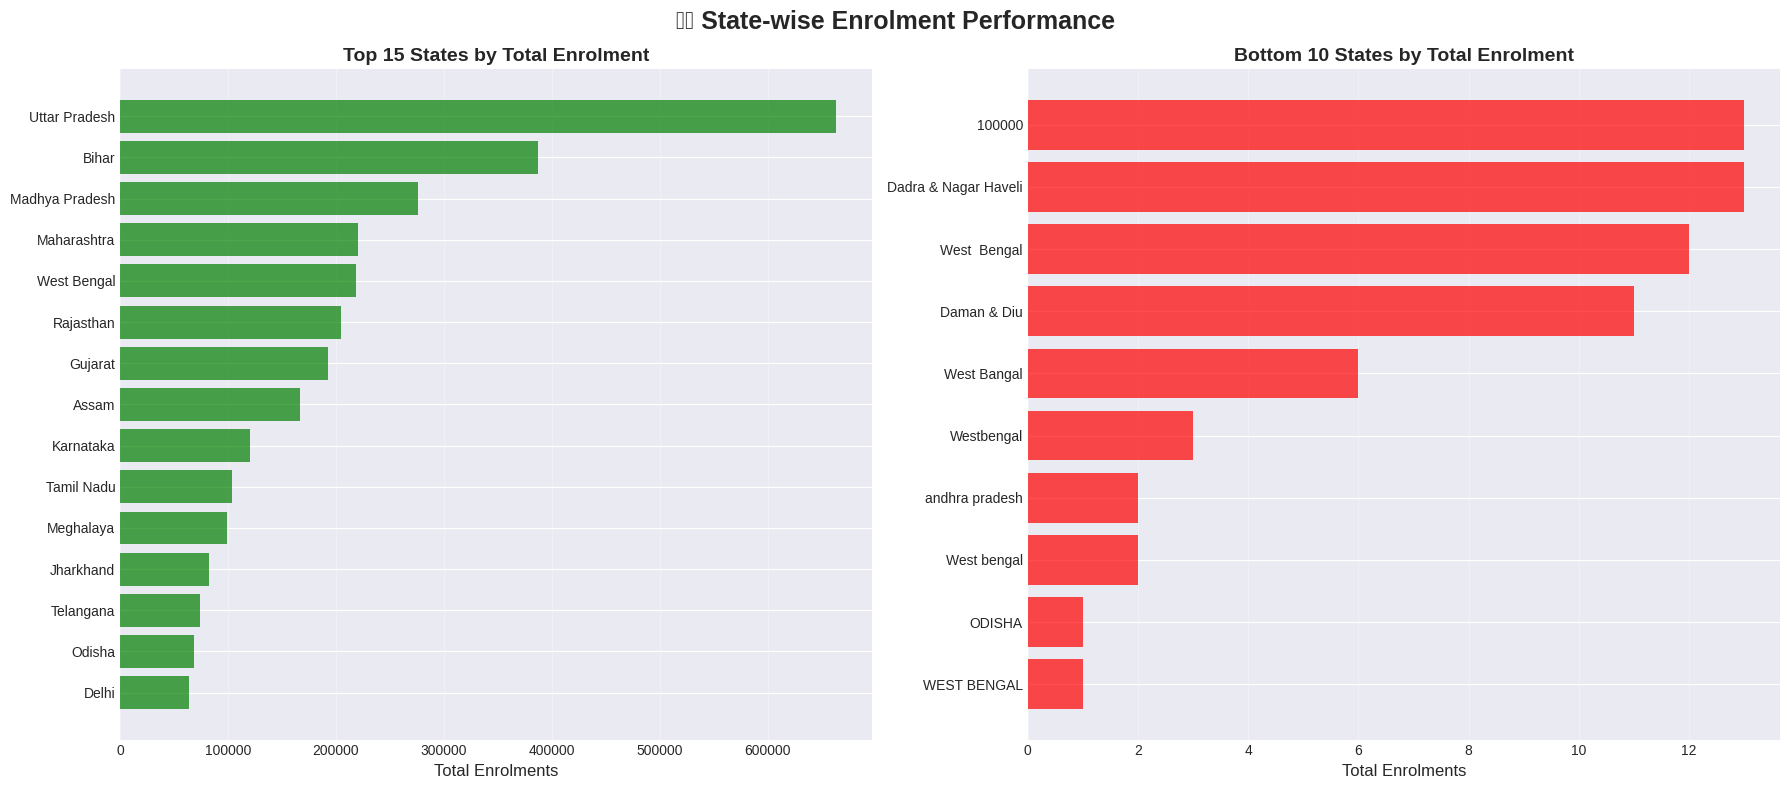


📊 Top 10 States Summary:


,state,Total,Average,Records
45,Uttar Pradesh,663768,11.80,56249
6,Bihar,387515,12.75,30393
27,Madhya Pradesh,276085,11.43,24163
28,Maharashtra,220535,5.84,37757
50,West Bengal,218621,5.55,39378
39,Rajasthan,204529,7.26,28187
16,Gujarat,192525,8.54,22541
5,Assam,166398,10.62,15662
23,Karnataka,120709,3.63,33239
41,Tamil Nadu,103942,2.34,44335


In [ ]:
# Aggregate by state
state_enrol = enrol.groupby('state').agg({
    'total_enrolment': ['sum', 'mean', 'count'],
    'age_0_5': 'sum',
    'age_5_17': 'sum',
    'age_18_greater': 'sum'
}).round(2)
state_enrol.columns = ['Total', 'Average', 'Records', 'Age_0_5', 'Age_5_17', 'Age_18_Greater']
state_enrol = state_enrol.reset_index()
state_enrol = state_enrol.sort_values('Total', ascending=False)

# Get top 15 and bottom 10 states
top_states = state_enrol.head(15)
bottom_states = state_enrol.tail(10)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('🗺️ State-wise Enrolment Performance', fontsize=18, fontweight='bold')

# Top 15 states
axes[0].barh(range(len(top_states)), top_states['Total'], color='green', alpha=0.7)
axes[0].set_yticks(range(len(top_states)))
axes[0].set_yticklabels(top_states['state'])
axes[0].set_title('Top 15 States by Total Enrolment', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Total Enrolments', fontsize=12)
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].invert_yaxis()

# Bottom 10 states
axes[1].barh(range(len(bottom_states)), bottom_states['Total'], color='red', alpha=0.7)
axes[1].set_yticks(range(len(bottom_states)))
axes[1].set_yticklabels(bottom_states['state'])
axes[1].set_title('Bottom 10 States by Total Enrolment', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Total Enrolments', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('visuals/bivariate/state_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Top 10 States Summary:")
display(top_states[['state', 'Total', 'Average', 'Records']].head(10))

11.2 District-wise Analysis

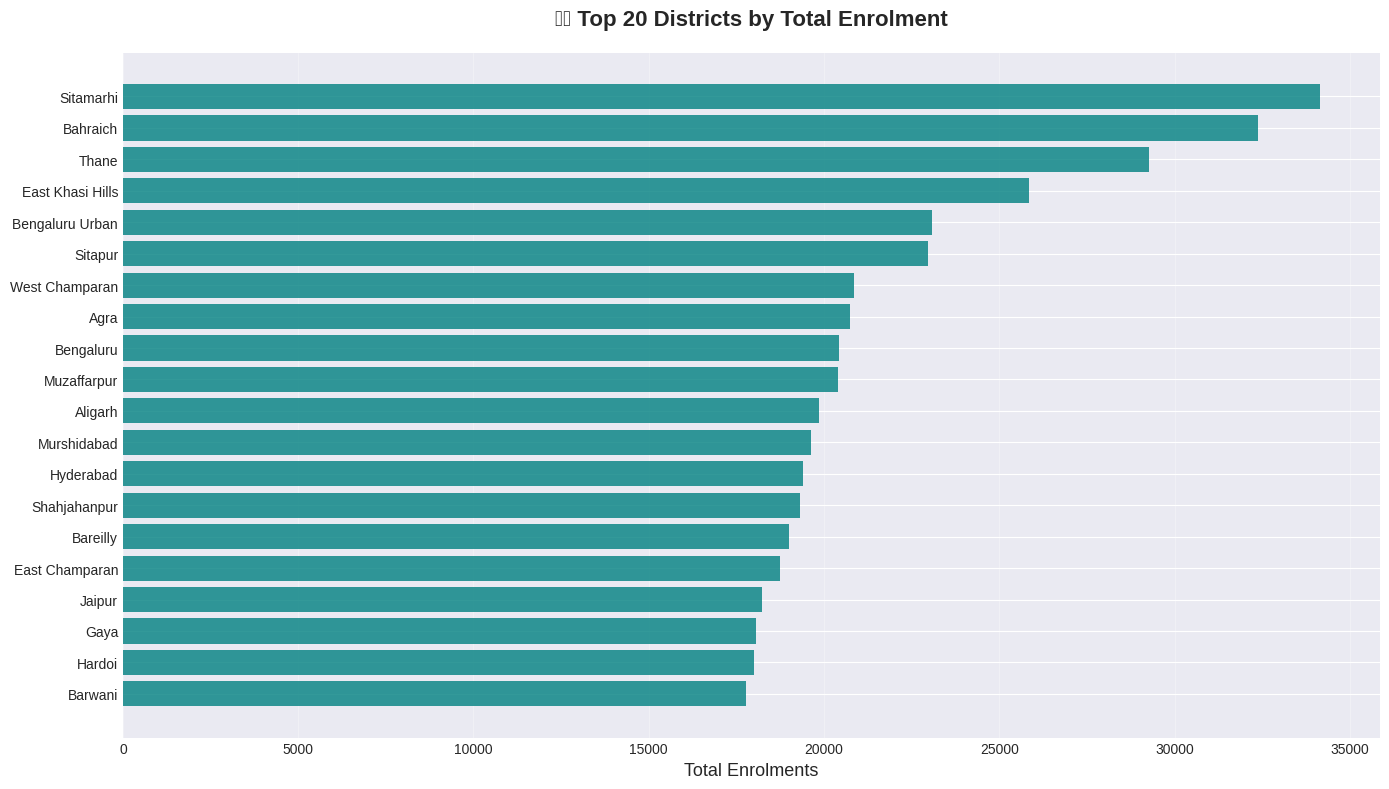

In [ ]:
# Aggregate by district (top 20)
district_enrol = enrol.groupby('district')['total_enrolment'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(14, 8))
plt.barh(range(len(district_enrol)), district_enrol.values, color='teal', alpha=0.8)
plt.yticks(range(len(district_enrol)), district_enrol.index)
plt.title('🏘️ Top 20 Districts by Total Enrolment', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Total Enrolments', fontsize=13)
plt.grid(True, alpha=0.3, axis='x')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('visuals/bivariate/district_performance.png', dpi=300, bbox_inches='tight')
plt.show()

11.3 Year vs State Performance

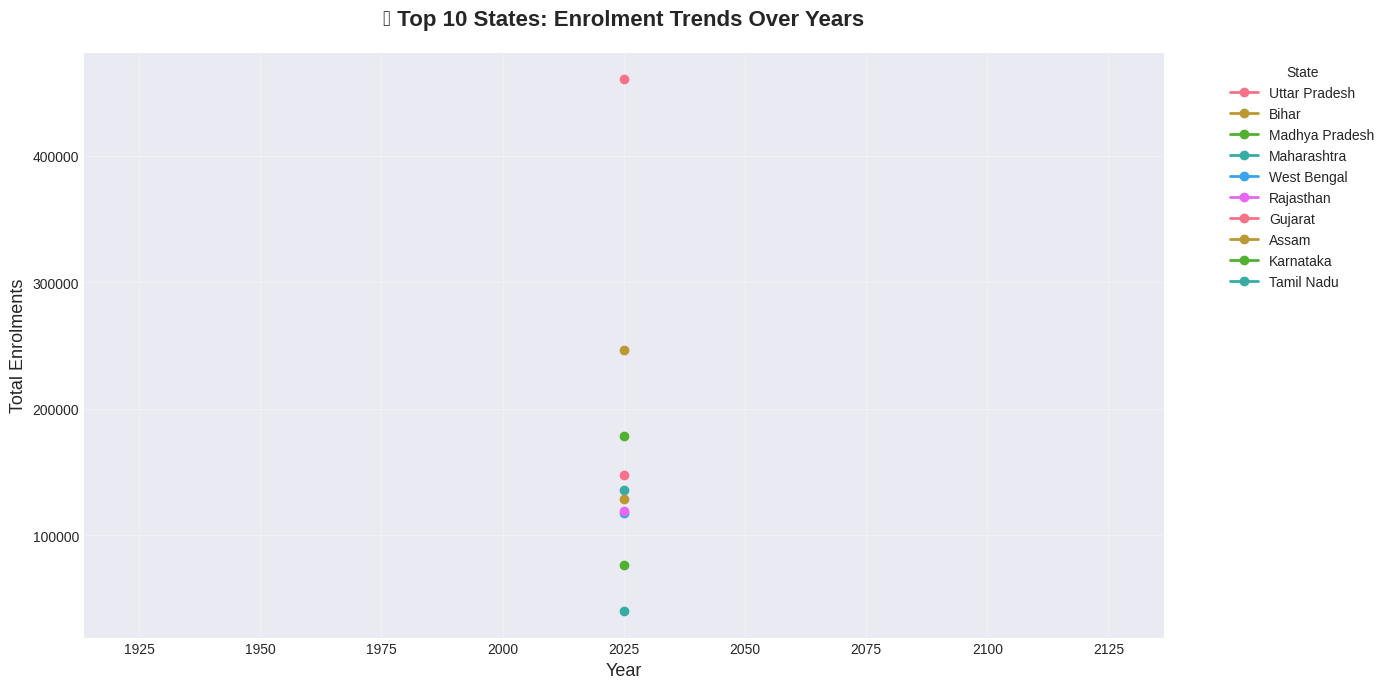

In [ ]:
# Create pivot for year vs state
year_state_pivot = enrol.groupby(['year', 'state'])['total_enrolment'].sum().reset_index()

# Get top 10 states overall
top_10_states = enrol.groupby('state')['total_enrolment'].sum().nlargest(10).index
year_state_top = year_state_pivot[year_state_pivot['state'].isin(top_10_states)]

plt.figure(figsize=(14, 7))
for state in top_10_states:
    data = year_state_top[year_state_top['state'] == state]
    plt.plot(data['year'], data['total_enrolment'], marker='o', linewidth=2, label=state)

plt.title('📈 Top 10 States: Enrolment Trends Over Years', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Total Enrolments', fontsize=13)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('visuals/bivariate/state_year_trends.png', dpi=300, bbox_inches='tight')
plt.show()

11.4 Demographic vs Biometric Updates Comparison

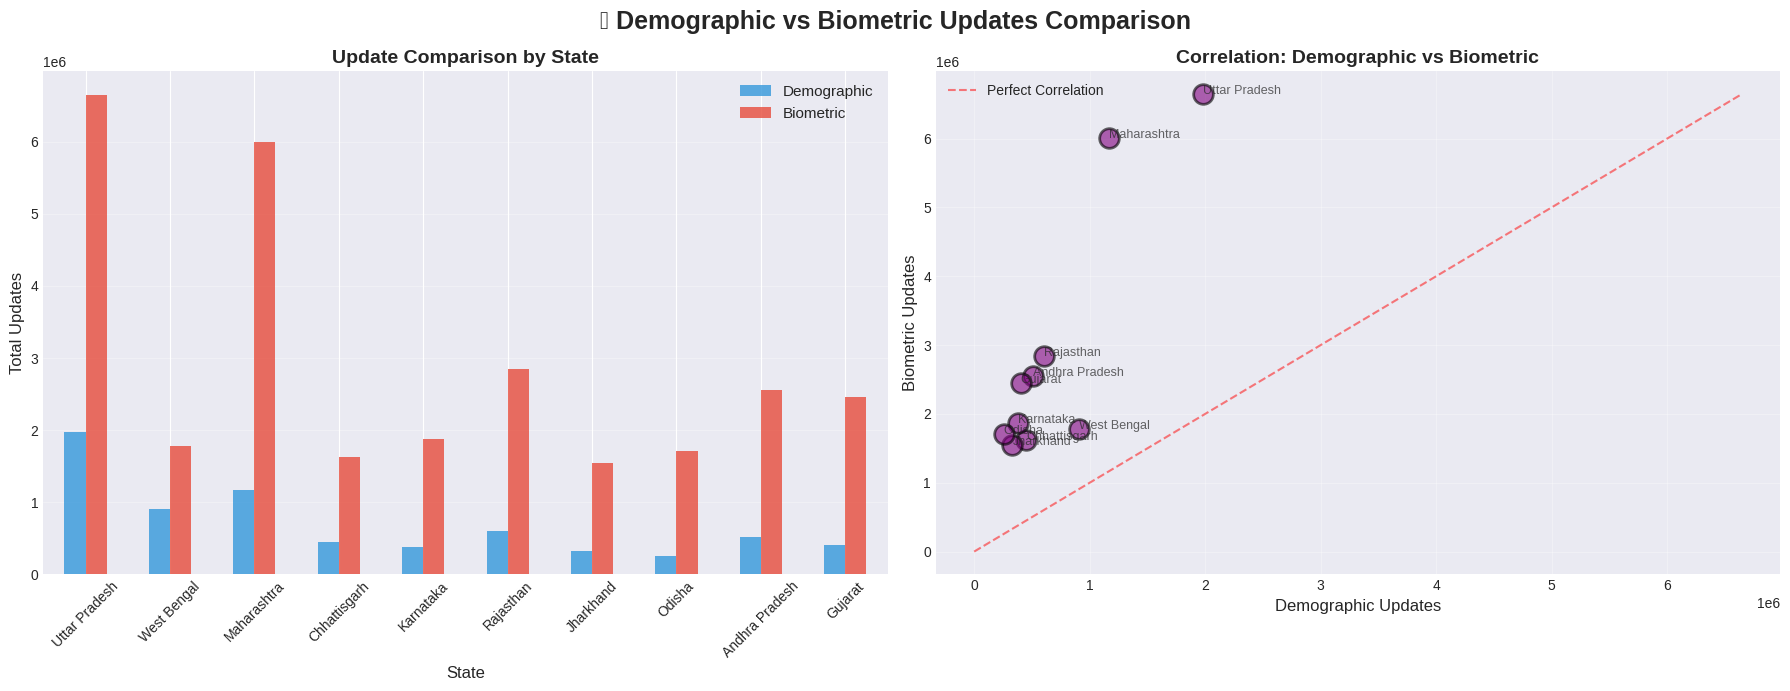

In [ ]:
# Compare demographic and biometric updates by state
demo_state = demo.groupby('state')['total_updates'].sum().sort_values(ascending=False).head(15)
bio_state = bio.groupby('state')['total_updates'].sum().sort_values(ascending=False).head(15)

# Get common top states
common_states = list(set(demo_state.index) & set(bio_state.index))[:10]

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Demographic': [demo_state.get(s, 0) for s in common_states],
    'Biometric': [bio_state.get(s, 0) for s in common_states]
}, index=common_states)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('🔄 Demographic vs Biometric Updates Comparison', fontsize=18, fontweight='bold')

# Grouped bar chart
comparison_df.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'], alpha=0.8)
axes[0].set_title('Update Comparison by State', fontsize=14, fontweight='bold')
axes[0].set_xlabel('State', fontsize=12)
axes[0].set_ylabel('Total Updates', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y')

# Scatter plot
axes[1].scatter(comparison_df['Demographic'], comparison_df['Biometric'],
                s=200, alpha=0.6, color='purple', edgecolors='black', linewidth=2)
for state in comparison_df.index:
    axes[1].annotate(state,
                     (comparison_df.loc[state, 'Demographic'],
                      comparison_df.loc[state, 'Biometric']),
                     fontsize=9, alpha=0.7)
axes[1].set_title('Correlation: Demographic vs Biometric', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Demographic Updates', fontsize=12)
axes[1].set_ylabel('Biometric Updates', fontsize=12)
axes[1].grid(True, alpha=0.3)

# Add diagonal line
max_val = max(comparison_df['Demographic'].max(), comparison_df['Biometric'].max())
axes[1].plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='Perfect Correlation')
axes[1].legend(fontsize=10)

plt.tight_layout()
plt.savefig('visuals/bivariate/demo_vs_bio_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

**12. TRIVARIATE ANALYSIS**

12.1 State × Year × Enrolment Heatmap

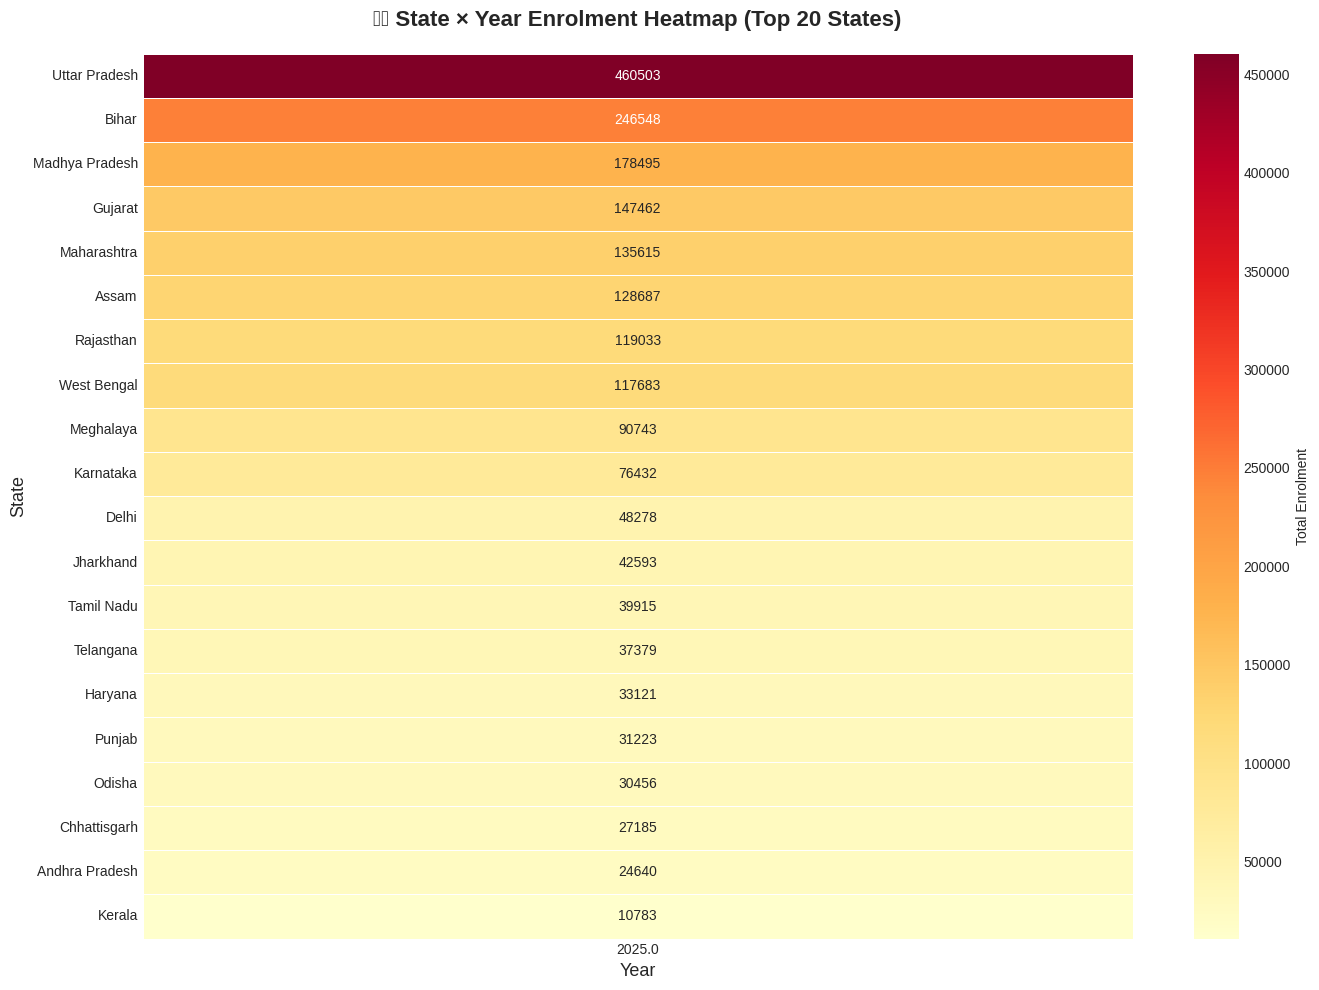

✅ State-Year matrix exported to: exports/state_year_matrix.csv


In [ ]:
# Create pivot table for top 20 states
pivot_enrol = enrol.pivot_table(
    values='total_enrolment',
    index='state',
    columns='year',
    aggfunc='sum',
    fill_value=0
)

# Sort by total and get top 20
pivot_enrol['Total'] = pivot_enrol.sum(axis=1)
pivot_enrol = pivot_enrol.sort_values('Total', ascending=False).head(20)
pivot_enrol = pivot_enrol.drop('Total', axis=1)

# Create heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_enrol,
            cmap='YlOrRd',
            annot=True,
            fmt='.0f',
            linewidths=0.5,
            cbar_kws={'label': 'Total Enrolment'})

plt.title('🗺️ State × Year Enrolment Heatmap (Top 20 States)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=13)
plt.ylabel('State', fontsize=13)
plt.tight_layout()
plt.savefig('visuals/trivariate/state_year_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Export to CSV
pivot_enrol.to_csv('exports/state_year_matrix.csv')
print("✅ State-Year matrix exported to: exports/state_year_matrix.csv")

12.2 State × Age Group × Enrolment

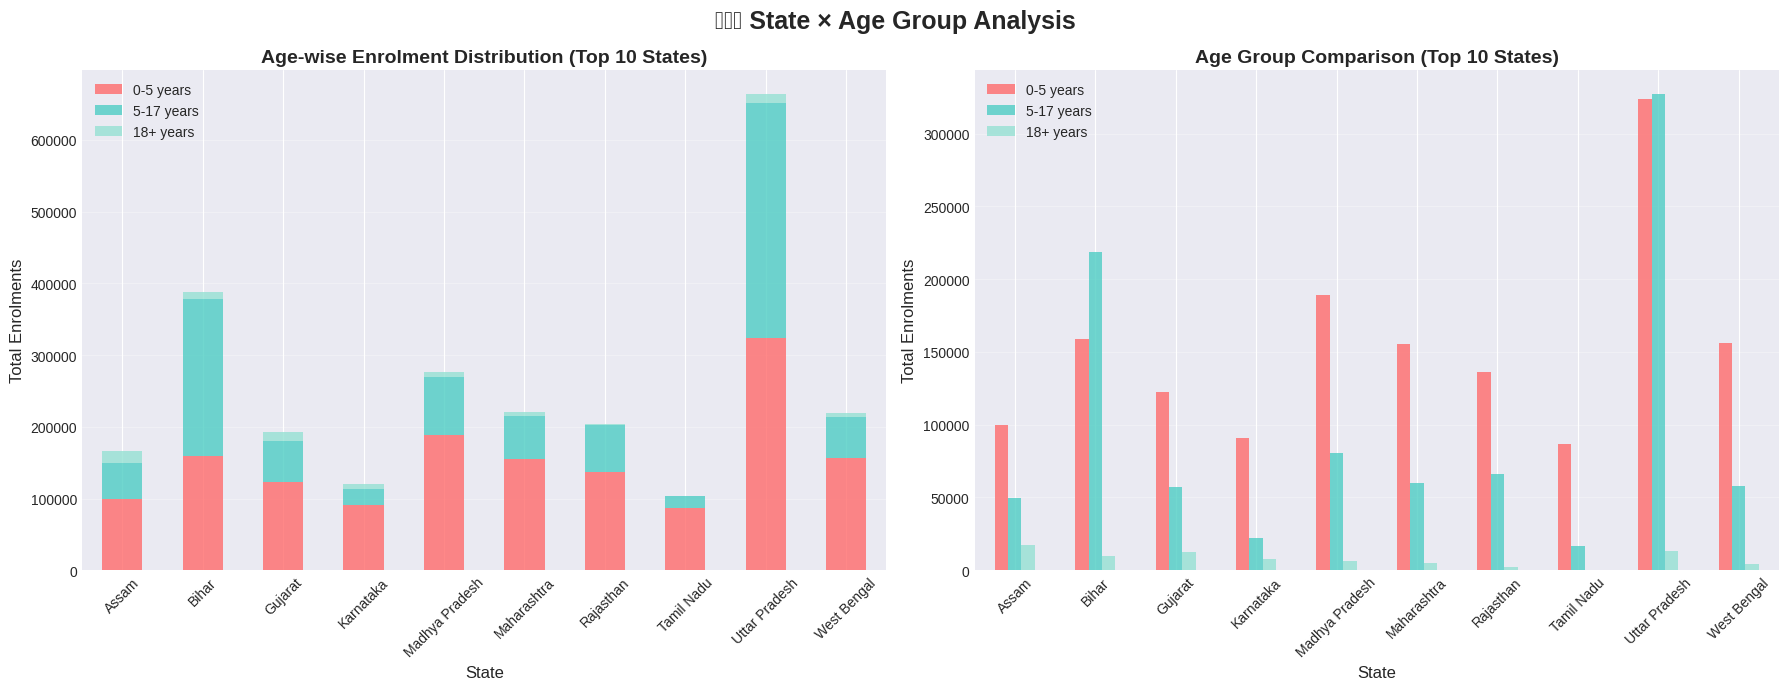

In [ ]:
# Get top 10 states
top_10_states = enrol.groupby('state')['total_enrolment'].sum().nlargest(10).index
state_age_data = enrol[enrol['state'].isin(top_10_states)]

# Aggregate by state and create age breakdown
state_age_summary = state_age_data.groupby('state').agg({
    'age_0_5': 'sum',
    'age_5_17': 'sum',
    'age_18_greater': 'sum'
}).reset_index()

# Melt for plotting
state_age_melted = state_age_summary.melt(
    id_vars='state',
    value_vars=['age_0_5', 'age_5_17', 'age_18_greater'],
    var_name='Age_Group',
    value_name='Enrolments'
)

# Create stacked bar chart
pivot_for_plot = state_age_summary.set_index('state')[['age_0_5', 'age_5_17', 'age_18_greater']]

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('🗺️👶 State × Age Group Analysis', fontsize=18, fontweight='bold')

# Stacked bar chart
pivot_for_plot.plot(kind='bar', stacked=True, ax=axes[0],
                    color=['#FF6B6B', '#4ECDC4', '#95E1D3'], alpha=0.8)
axes[0].set_title('Age-wise Enrolment Distribution (Top 10 States)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('State', fontsize=12)
axes[0].set_ylabel('Total Enrolments', fontsize=12)
axes[0].legend(['0-5 years', '5-17 years', '18+ years'], fontsize=10)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Grouped bar chart
state_age_summary.set_index('state')[['age_0_5', 'age_5_17', 'age_18_greater']].plot(
    kind='bar', ax=axes[1], color=['#FF6B6B', '#4ECDC4', '#95E1D3'], alpha=0.8
)
axes[1].set_title('Age Group Comparison (Top 10 States)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('State', fontsize=12)
axes[1].set_ylabel('Total Enrolments', fontsize=12)
axes[1].legend(['0-5 years', '5-17 years', '18+ years'], fontsize=10)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('visuals/trivariate/state_age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

12.3 Year × Quarter × Age Group (3D Visualization)

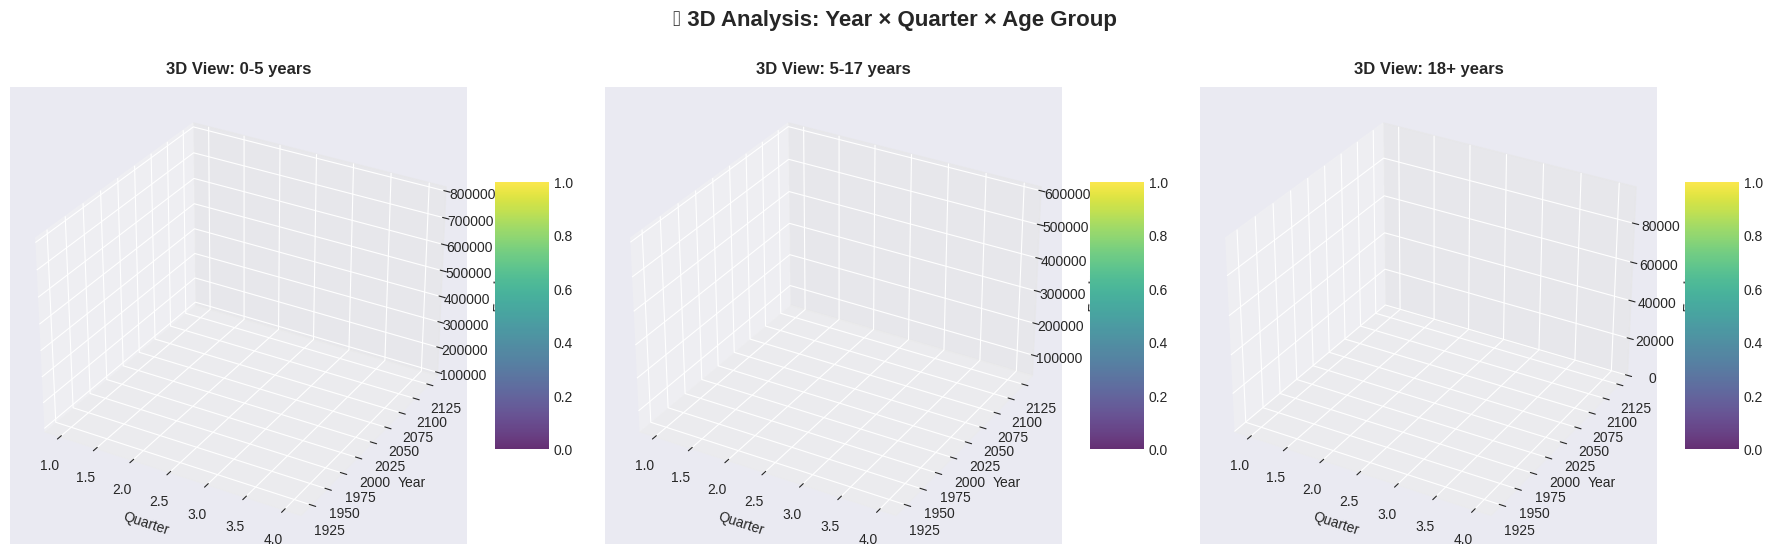

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Aggregate quarterly data by age groups
quarterly_age = enrol.groupby(['year', 'quarter']).agg({
    'age_0_5': 'sum',
    'age_5_17': 'sum',
    'age_18_greater': 'sum'
}).reset_index()

# Create 3D plot
fig = plt.figure(figsize=(18, 6))

# Plot for each age group
age_groups = [('age_0_5', '0-5 years', '#FF6B6B'),
              ('age_5_17', '5-17 years', '#4ECDC4'),
              ('age_18_greater', '18+ years', '#95E1D3')]

for idx, (col, label, color) in enumerate(age_groups, 1):
    ax = fig.add_subplot(1, 3, idx, projection='3d')

    pivot_data = quarterly_age.pivot(index='year', columns='quarter', values=col)

    x = pivot_data.columns
    y = pivot_data.index
    X, Y = np.meshgrid(x, y)
    Z = pivot_data.values

    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')

    ax.set_xlabel('Quarter', fontsize=10, labelpad=5)
    ax.set_ylabel('Year', fontsize=10, labelpad=5)
    ax.set_zlabel('Enrolments', fontsize=10, labelpad=5)
    ax.set_title(f'3D View: {label}', fontsize=12, fontweight='bold', pad=10)

    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.suptitle('📊 3D Analysis: Year × Quarter × Age Group', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('visuals/trivariate/year_quarter_age_3d.png', dpi=300, bbox_inches='tight')
plt.show()

12.4 District × State × Updates Heatmap (Demographic)

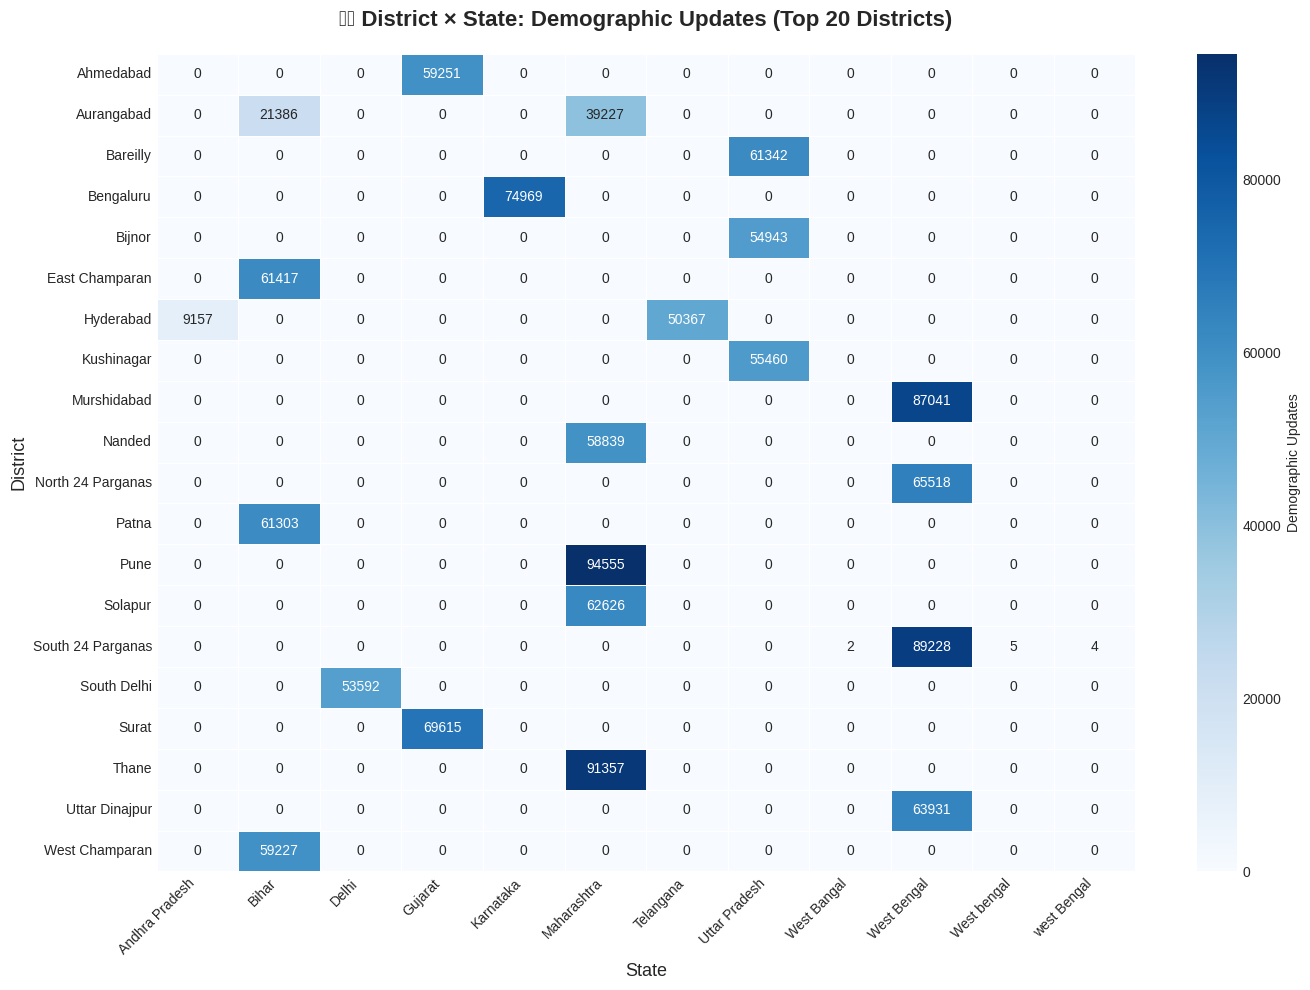

In [ ]:
# Get top 20 districts by demographic updates
top_districts = demo.groupby('district')['total_updates'].sum().nlargest(20).index
district_state_data = demo[demo['district'].isin(top_districts)]

# Create pivot
district_state_pivot = district_state_data.pivot_table(
    values='total_updates',
    index='district',
    columns='state',
    aggfunc='sum',
    fill_value=0
)

# Keep only columns with significant data
district_state_pivot = district_state_pivot.loc[:, (district_state_pivot.sum(axis=0) > 0)]

plt.figure(figsize=(14, 10))
sns.heatmap(district_state_pivot,
            cmap='Blues',
            annot=True,
            fmt='.0f',
            linewidths=0.5,
            cbar_kws={'label': 'Demographic Updates'})

plt.title('🏘️ District × State: Demographic Updates (Top 20 Districts)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('State', fontsize=13)
plt.ylabel('District', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('visuals/trivariate/district_state_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

13. **TIME SERIES FORECASTING**

13.1 Prepare Time Series Data (Demographic Updates)

In [ ]:
print("🔄 Preparing time series data for forecasting...\n")

# Aggregate daily demographic updates
ts_data_demo = demo.groupby('date')['total_updates'].sum().reset_index()
ts_data_demo.columns = ['ds', 'y']
ts_data_demo = ts_data_demo.dropna()
ts_data_demo = ts_data_demo.sort_values('ds')

print(f"✅ Demographic time series prepared: {len(ts_data_demo)} data points")
print(f"   Date range: {ts_data_demo['ds'].min()} to {ts_data_demo['ds'].max()}")
print(f"\n📊 Summary Statistics:")
display(ts_data_demo['y'].describe())

🔄 Preparing time series data for forecasting...

✅ Demographic time series prepared: 93 data points
   Date range: 2025-03-01 00:00:00 to 2025-12-29 00:00:00

📊 Summary Statistics:


,y
count,9.300000e+01
mean,1.204245e+05
std,2.556602e+05
min,4.368000e+03
25%,5.070900e+04
50%,7.635900e+04
75%,1.237900e+05
max,2.466585e+06


13.2 Build and Train Prophet Model

In [ ]:
print("\n🤖 Training Prophet forecasting model...\n")

# Initialize Prophet model
model_demo = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.05
)

# Fit model
model_demo.fit(ts_data_demo)

# Create future dataframe (180 days forecast)
future_demo = model_demo.make_future_dataframe(periods=180, freq='D')

print(f"✅ Model trained successfully!")
print(f"   Forecasting 180 days into the future")


🤖 Training Prophet forecasting model...

✅ Model trained successfully!
   Forecasting 180 days into the future


13.3 Generate Forecast

In [ ]:
# Make predictions
forecast_demo = model_demo.predict(future_demo)

print("\n📊 Forecast Preview (Last 10 days):")
display(forecast_demo[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))


📊 Forecast Preview (Last 10 days):


,ds,yhat,yhat_lower,yhat_upper
263,2026-06-18,-1.235536e+06,-1.292443e+06,-1.179800e+06
264,2026-06-19,-2.504179e+06,-2.558698e+06,-2.450003e+06
265,2026-06-20,-3.699740e+06,-3.751270e+06,-3.640958e+06
266,2026-06-21,-4.736231e+06,-4.788010e+06,-4.678880e+06
267,2026-06-22,-5.507718e+06,-5.560656e+06,-5.453951e+06
268,2026-06-23,-6.057249e+06,-6.116253e+06,-6.001072e+06
269,2026-06-24,-6.331001e+06,-6.382733e+06,-6.274603e+06
270,2026-06-25,-6.314923e+06,-6.367718e+06,-6.258181e+06
271,2026-06-26,-5.979737e+06,-6.037689e+06,-5.924730e+06
272,2026-06-27,-5.363672e+06,-5.414543e+06,-5.308754e+06


13.4 Visualize Forecast

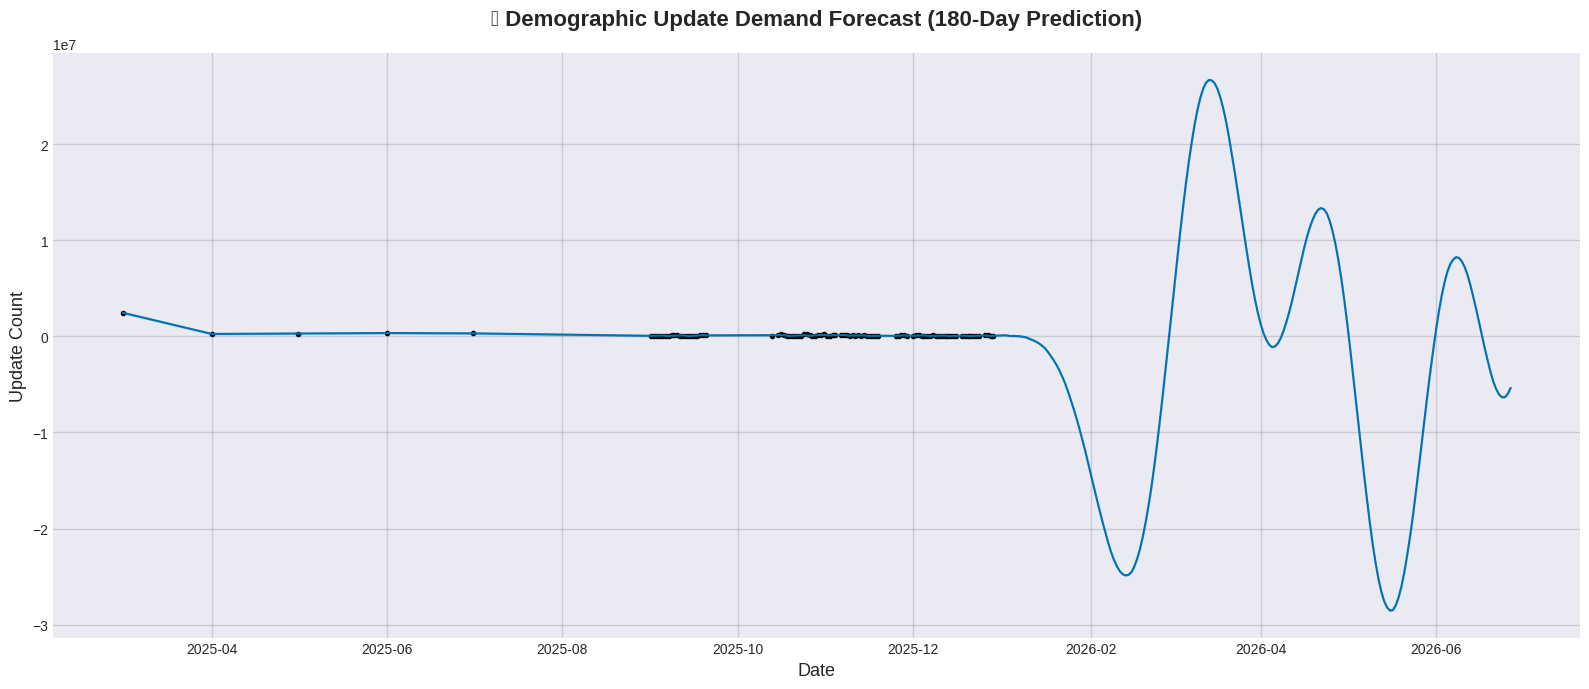

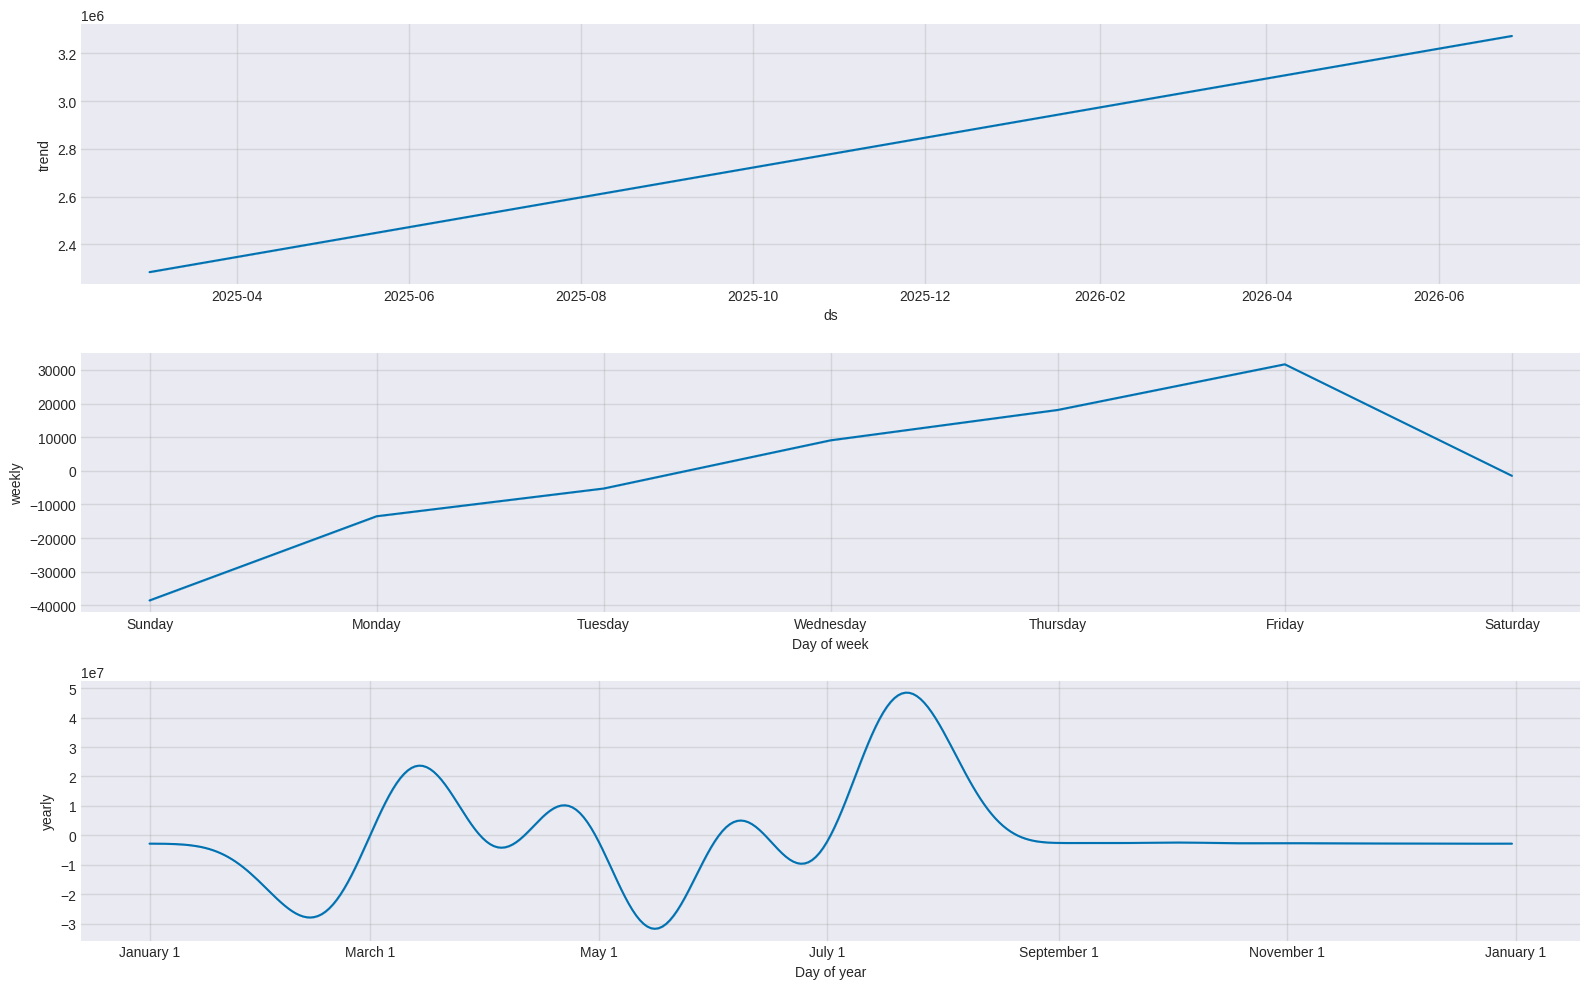

In [ ]:
# Main forecast plot
fig1 = model_demo.plot(forecast_demo, figsize=(16, 7))
plt.title('📈 Demographic Update Demand Forecast (180-Day Prediction)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Update Count', fontsize=13)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('visuals/forecasting/demographic_forecast_main.png', dpi=300, bbox_inches='tight')
plt.show()

# Components plot
fig2 = model_demo.plot_components(forecast_demo, figsize=(16, 10))
plt.tight_layout()
plt.savefig('visuals/forecasting/forecast_components.png', dpi=300, bbox_inches='tight')
plt.show()

13.5 Comprehensive Forecast Analysis

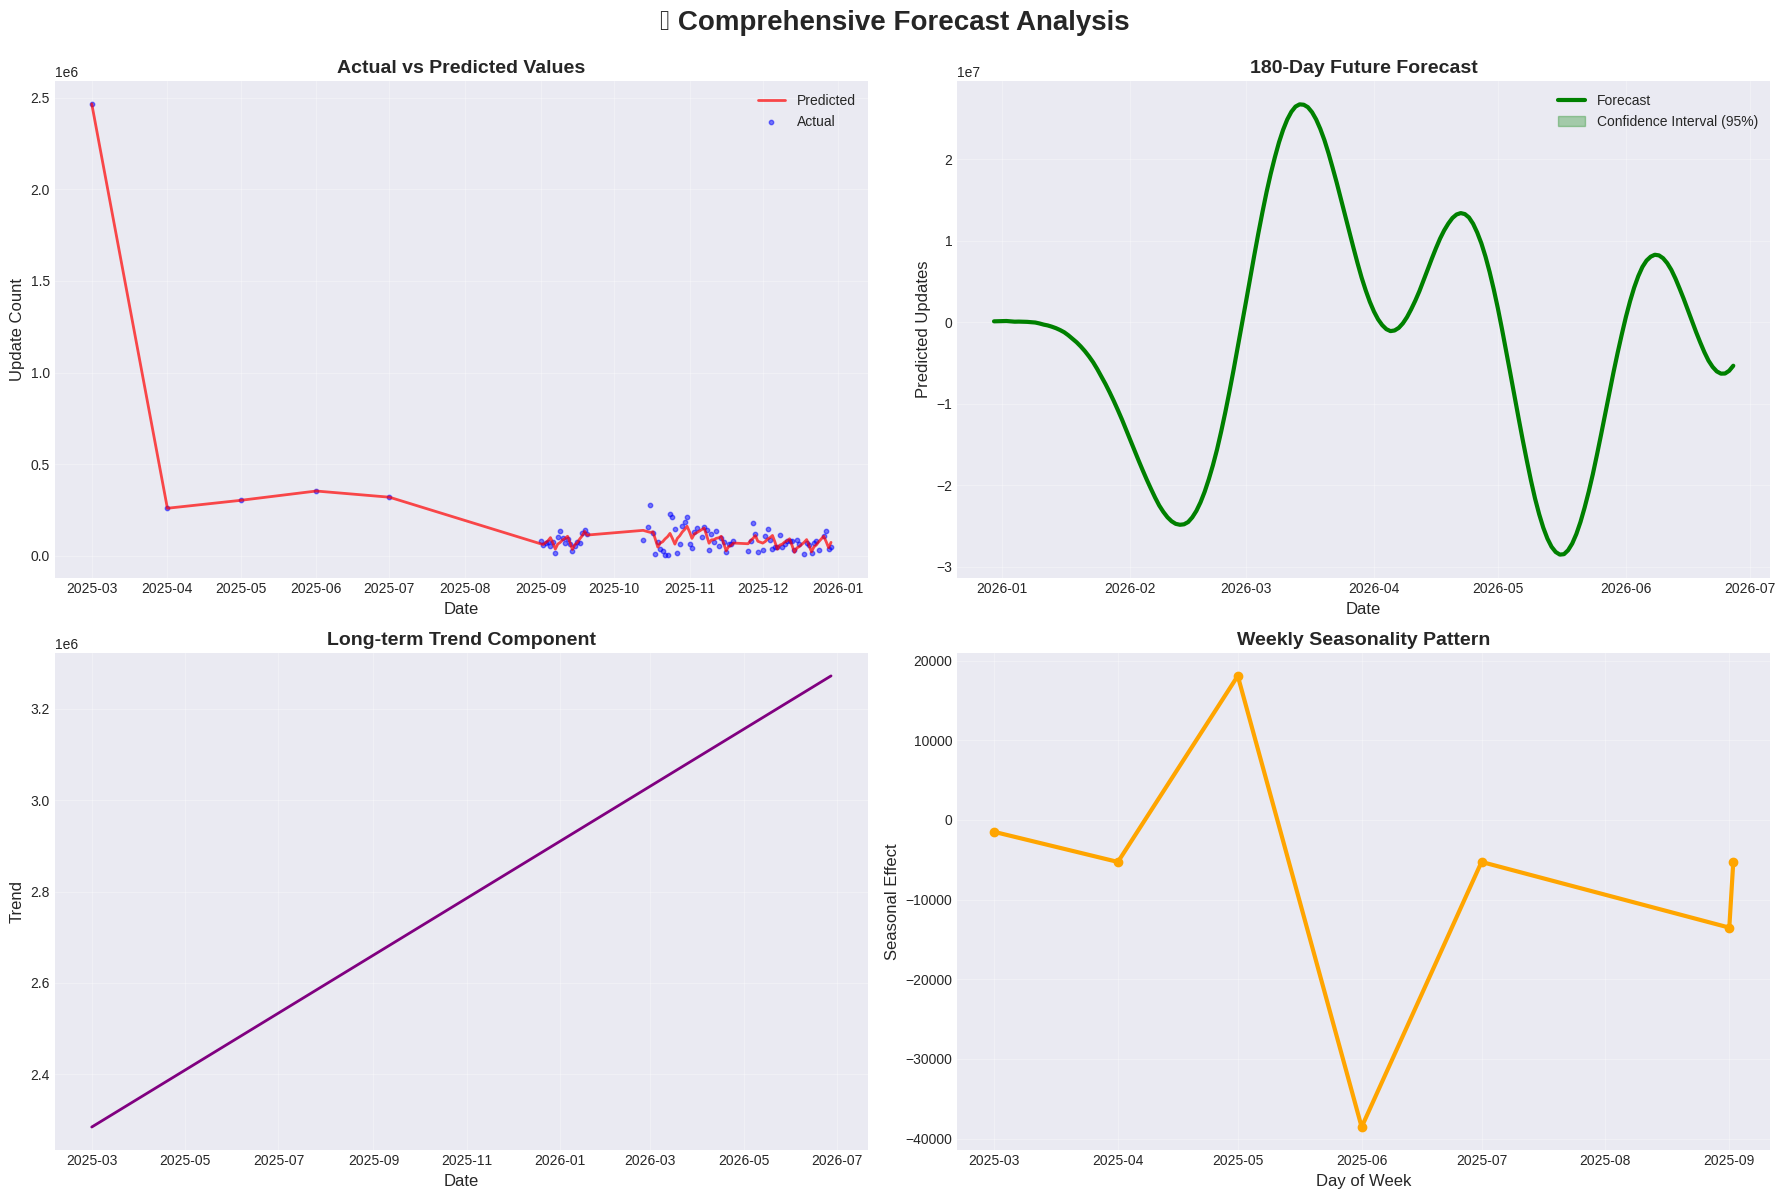


✅ Forecast results exported to: exports/forecast_results.csv


In [ ]:
# Create detailed forecast visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('🔮 Comprehensive Forecast Analysis', fontsize=20, fontweight='bold', y=0.995)

# Plot 1: Actual vs Predicted
actual_data = forecast_demo[forecast_demo['ds'] <= ts_data_demo['ds'].max()]
axes[0, 0].plot(actual_data['ds'], actual_data['yhat'],
                label='Predicted', linewidth=2, color='red', alpha=0.7)
axes[0, 0].scatter(ts_data_demo['ds'], ts_data_demo['y'],
                   label='Actual', s=10, color='blue', alpha=0.5)
axes[0, 0].set_title('Actual vs Predicted Values', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Date', fontsize=12)
axes[0, 0].set_ylabel('Update Count', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Future Forecast with Confidence Interval
future_data = forecast_demo[forecast_demo['ds'] > ts_data_demo['ds'].max()]
axes[0, 1].plot(future_data['ds'], future_data['yhat'],
                linewidth=3, color='green', label='Forecast')
axes[0, 1].fill_between(future_data['ds'],
                        future_data['yhat_lower'],
                        future_data['yhat_upper'],
                        alpha=0.3, color='green', label='Confidence Interval (95%)')
axes[0, 1].set_title('180-Day Future Forecast', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Date', fontsize=12)
axes[0, 1].set_ylabel('Predicted Updates', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Trend Component
axes[1, 0].plot(forecast_demo['ds'], forecast_demo['trend'], linewidth=2, color='purple')
axes[1, 0].set_title('Long-term Trend Component', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Date', fontsize=12)
axes[1, 0].set_ylabel('Trend', fontsize=12)
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Weekly Seasonality
if 'weekly' in forecast_demo.columns:
    axes[1, 1].plot(forecast_demo['ds'][:7], forecast_demo['weekly'][:7],
                    linewidth=3, marker='o', color='orange')
    axes[1, 1].set_title('Weekly Seasonality Pattern', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Day of Week', fontsize=12)
    axes[1, 1].set_ylabel('Seasonal Effect', fontsize=12)
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('visuals/forecasting/comprehensive_forecast.png', dpi=300, bbox_inches='tight')
plt.show()

# Export forecast
forecast_export = forecast_demo[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
forecast_export.columns = ['Date', 'Predicted', 'Lower_Bound', 'Upper_Bound']
forecast_export.to_csv('exports/forecast_results.csv', index=False)
print("\n✅ Forecast results exported to: exports/forecast_results.csv")

13.6 Biometric Updates Forecast

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 12.


🔄 Training biometric forecast model...



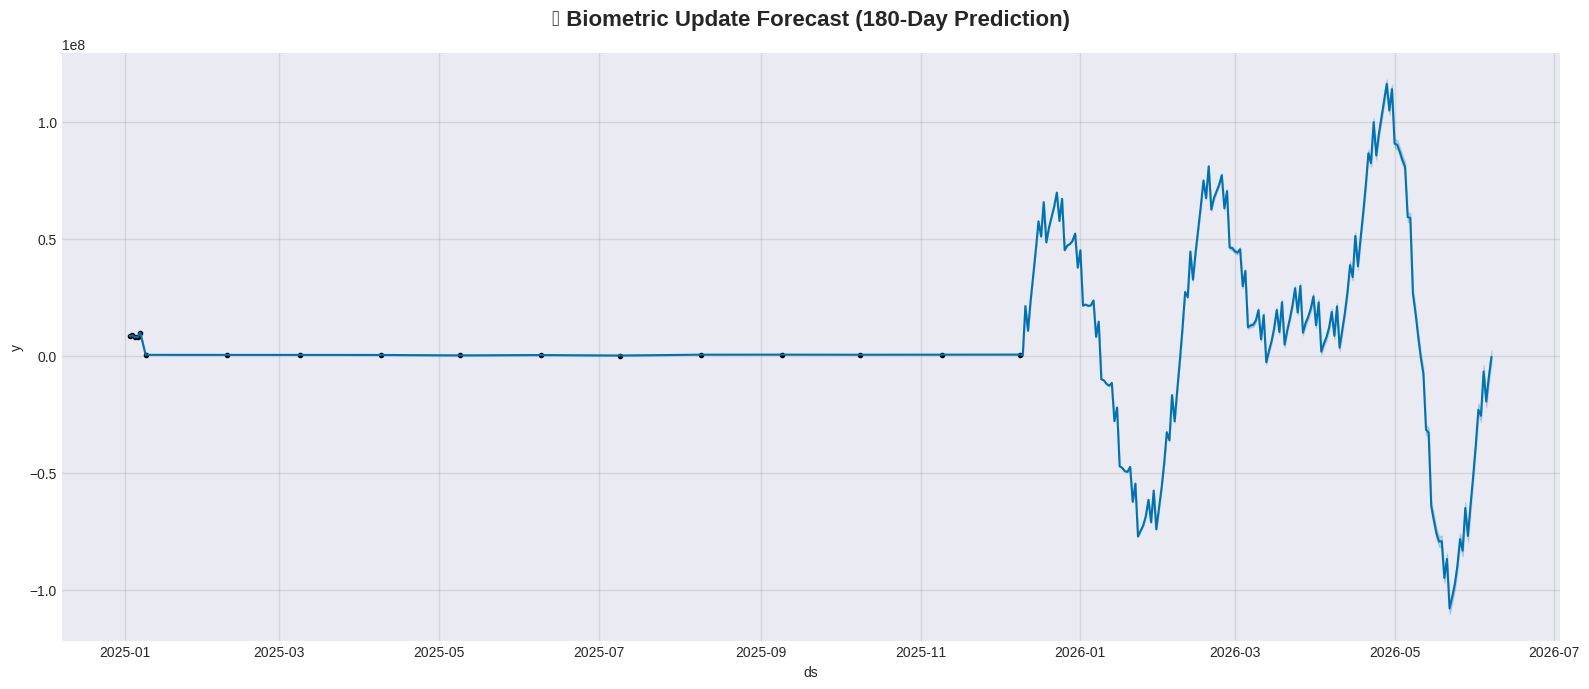

✅ Biometric forecast complete!


In [ ]:
# Prepare biometric time series
ts_data_bio = bio.groupby('date')['total_updates'].sum().reset_index()
ts_data_bio.columns = ['ds', 'y']
ts_data_bio = ts_data_bio.dropna().sort_values('ds')

if len(ts_data_bio) > 10:
    print("🔄 Training biometric forecast model...\n")

    model_bio = Prophet(yearly_seasonality=True, weekly_seasonality=True)
    model_bio.fit(ts_data_bio)

    future_bio = model_bio.make_future_dataframe(periods=180, freq='D')
    forecast_bio = model_bio.predict(future_bio)

    # Plot
    fig = model_bio.plot(forecast_bio, figsize=(16, 7))
    plt.title('📈 Biometric Update Forecast (180-Day Prediction)',
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('visuals/forecasting/biometric_forecast.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✅ Biometric forecast complete!")
else:
    print("⚠️  Insufficient biometric data for forecasting")

14. **DISTRICT CLUSTERING**

14.1 Prepare District Data

In [ ]:
print("🔄 Preparing district-level data for clustering...\n")

# Aggregate demographic data by district
district_demo = demo.groupby('district').agg({
    'total_updates': ['sum', 'mean', 'std', 'count'],
    'demo_age_5_17': 'sum',
    'demo_age_17_': 'sum'
}).round(2)

district_demo.columns = ['Total_Updates', 'Avg_Updates', 'Std_Updates',
                         'Transaction_Count', 'Updates_5_17', 'Updates_17_Plus']
district_demo = district_demo.reset_index()
district_demo = district_demo.dropna()

print(f"✅ District data prepared: {len(district_demo)} districts")
print(f"\n📊 Sample Data:")
display(district_demo.head(10))

print(f"\n📊 Summary Statistics:")
display(district_demo[['Total_Updates', 'Avg_Updates', 'Transaction_Count']].describe())

🔄 Preparing district-level data for clustering...

✅ District data prepared: 946 districts

📊 Sample Data:


,district,Total_Updates,Avg_Updates,Std_Updates,Transaction_Count,Updates_5_17,Updates_17_Plus
1,ANGUL,3,1.00,0.00,3,0,3
2,ANUGUL,39,2.05,1.03,19,0,39
3,Adilabad,16869,10.34,43.12,1631,1999,14870
4,Agar Malwa,1606,14.60,37.84,110,148,1458
5,Agra,38614,65.89,150.52,586,4093,34521
6,Ahilyanagar,443,2.36,2.25,188,38,405
7,Ahmadabad,1845,2.73,2.46,676,80,1765
8,Ahmadnagar,49973,26.52,45.34,1884,1925,48048
9,Ahmed Nagar,1383,3.56,5.01,389,27,1356
10,Ahmedabad,59251,34.87,155.83,1699,6874,52377



📊 Summary Statistics:


,Total_Updates,Avg_Updates,Transaction_Count
count,946.000000,946.000000,946.000000
mean,11838.756871,23.853763,528.521142
std,14135.679555,27.524082,532.466269
min,2.000000,1.000000,2.000000
25%,1567.000000,6.005000,155.250000
50%,7289.000000,14.260000,374.000000
75%,16611.250000,33.475000,701.500000
max,94555.000000,260.260000,3088.000000


14.2 Feature Scaling


In [ ]:
# Select features for clustering
features = ['Avg_Updates', 'Total_Updates', 'Transaction_Count']
X = district_demo[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Features standardized for clustering")
print(f"   Features used: {', '.join(features)}")
print(f"   Shape: {X_scaled.shape}")

✅ Features standardized for clustering
   Features used: Avg_Updates, Total_Updates, Transaction_Count
   Shape: (946, 3)


14.3 Determine Optimal Number of Clusters

🔄 Testing different cluster sizes...

   K=2: Inertia=1716.20, Silhouette=0.496
   K=3: Inertia=1165.90, Silhouette=0.509
   K=4: Inertia=927.18, Silhouette=0.468
   K=5: Inertia=722.94, Silhouette=0.474
   K=6: Inertia=584.11, Silhouette=0.444
   K=7: Inertia=471.67, Silhouette=0.464
   K=8: Inertia=418.79, Silhouette=0.453
   K=9: Inertia=374.91, Silhouette=0.453
   K=10: Inertia=339.20, Silhouette=0.416


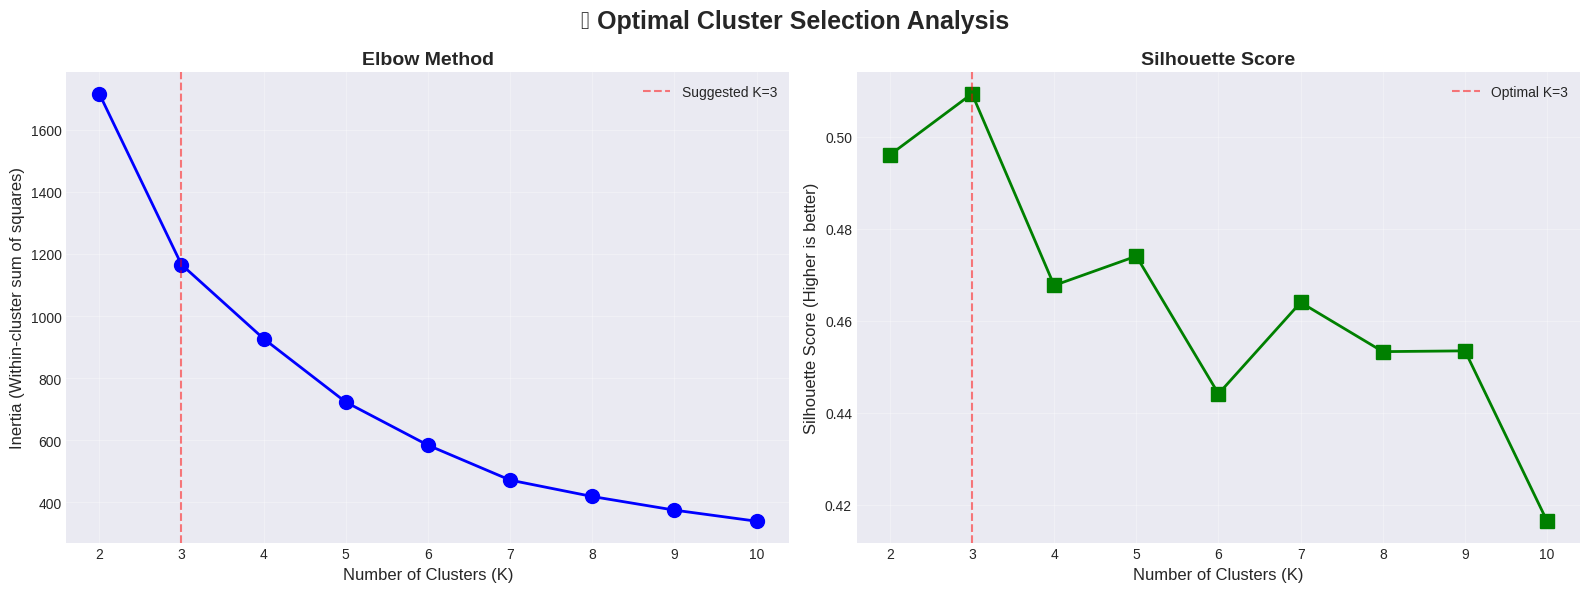


✅ Optimal number of clusters: 3
   Best silhouette score: 0.509


In [ ]:
# Elbow method and Silhouette analysis
inertias = []
silhouette_scores = []
K_range = range(2, min(11, len(district_demo) // 2))

print("🔄 Testing different cluster sizes...\n")

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    print(f"   K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_score(X_scaled, kmeans.labels_):.3f}")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('📊 Optimal Cluster Selection Analysis', fontsize=18, fontweight='bold')

# Elbow plot
axes[0].plot(K_range, inertias, marker='o', linewidth=2, markersize=10, color='blue')
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[0].set_ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x=3, color='red', linestyle='--', alpha=0.5, label='Suggested K=3')
axes[0].legend()

# Silhouette plot
axes[1].plot(K_range, silhouette_scores, marker='s', linewidth=2, markersize=10, color='green')
axes[1].set_title('Silhouette Score', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score (Higher is better)', fontsize=12)
axes[1].grid(True, alpha=0.3)

# Mark optimal K
optimal_k = K_range[np.argmax(silhouette_scores)]
axes[1].axvline(x=optimal_k, color='red', linestyle='--', alpha=0.5, label=f'Optimal K={optimal_k}')
axes[1].legend()

plt.tight_layout()
plt.savefig('visuals/clustering/optimal_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✅ Optimal number of clusters: {optimal_k}")
print(f"   Best silhouette score: {max(silhouette_scores):.3f}")

14.4 Perform K-Means Clustering

In [ ]:
# Use optimal K (defaulting to 3 for resource planning: Low/Medium/High)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
district_demo['Cluster'] = kmeans.fit_predict(X_scaled)

print(f"✅ K-Means clustering complete with {n_clusters} clusters!\n")

print("📊 Cluster Distribution:")
print(district_demo['Cluster'].value_counts().sort_index())

# Cluster statistics
cluster_stats = district_demo.groupby('Cluster')[features].mean().round(2)
print(f"\n📊 Cluster Characteristics:")
display(cluster_stats)

# Assign cluster labels
cluster_labels = {
    0: "🔴 Low Demand Districts",
    1: "🟡 Medium Demand Districts",
    2: "🟢 High Demand Districts"
}

# Sort clusters by average updates for proper labeling
cluster_order = cluster_stats['Avg_Updates'].sort_values().index
cluster_mapping = {old: new for new, old in enumerate(cluster_order)}
district_demo['Cluster_Label'] = district_demo['Cluster'].map(cluster_mapping)

✅ K-Means clustering complete with 3 clusters!

📊 Cluster Distribution:
Cluster
0    644
1    188
2    114
Name: count, dtype: int64

📊 Cluster Characteristics:


,Avg_Updates,Total_Updates,Transaction_Count
Cluster,,,
0,12.86,4614.24,343.92
1,64.52,25460.29,459.41
2,18.89,30187.35,1685.34


14.5 Visualize Clusters (3D)

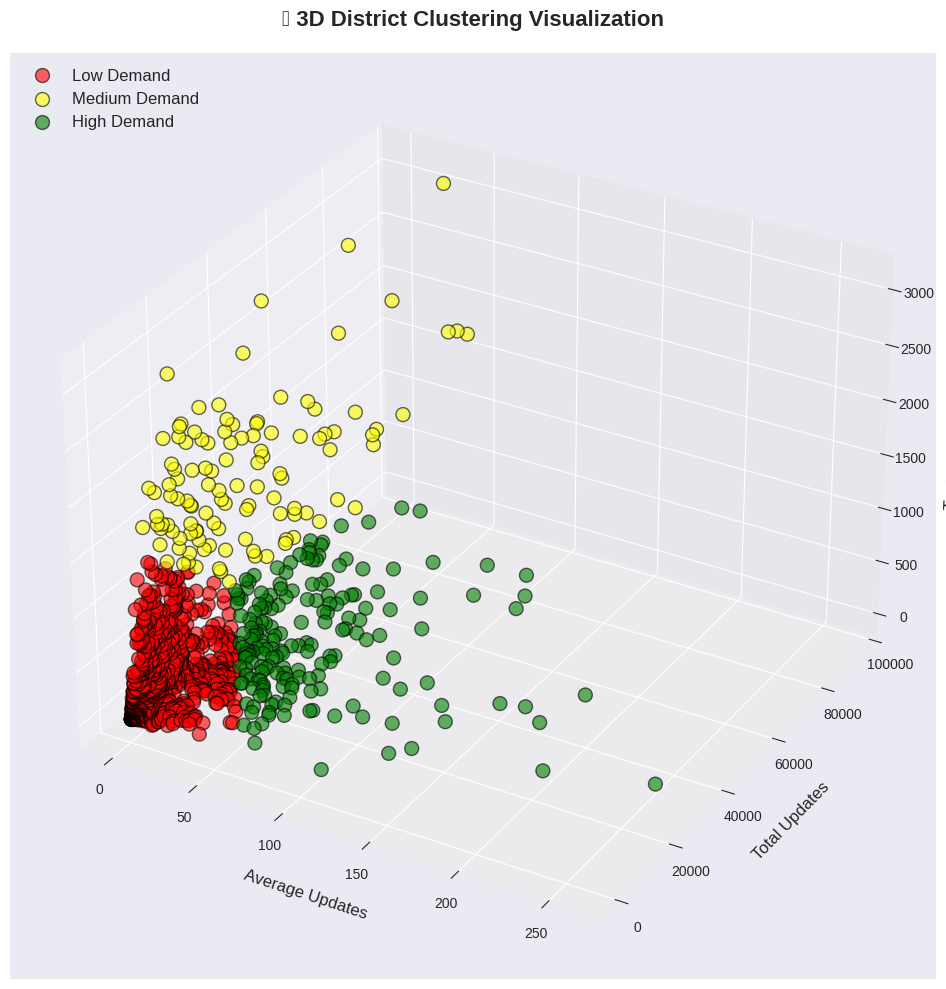

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter plot
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'yellow', 'green']
labels = ['Low Demand', 'Medium Demand', 'High Demand']

for i in range(n_clusters):
    cluster_points = district_demo[district_demo['Cluster_Label'] == i]
    ax.scatter(cluster_points['Avg_Updates'],
               cluster_points['Total_Updates'],
               cluster_points['Transaction_Count'],
               c=colors[i],
               label=labels[i],
               s=100,
               alpha=0.6,
               edgecolors='black',
               linewidth=1)

ax.set_xlabel('Average Updates', fontsize=12, labelpad=10)
ax.set_ylabel('Total Updates', fontsize=12, labelpad=10)
ax.set_zlabel('Transaction Count', fontsize=12, labelpad=10)
ax.set_title('🎯 3D District Clustering Visualization', fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='upper left')

plt.tight_layout()
plt.savefig('visuals/clustering/district_clusters_3d.png', dpi=300, bbox_inches='tight')
plt.show()

14.6 Cluster Profiles and Analysis

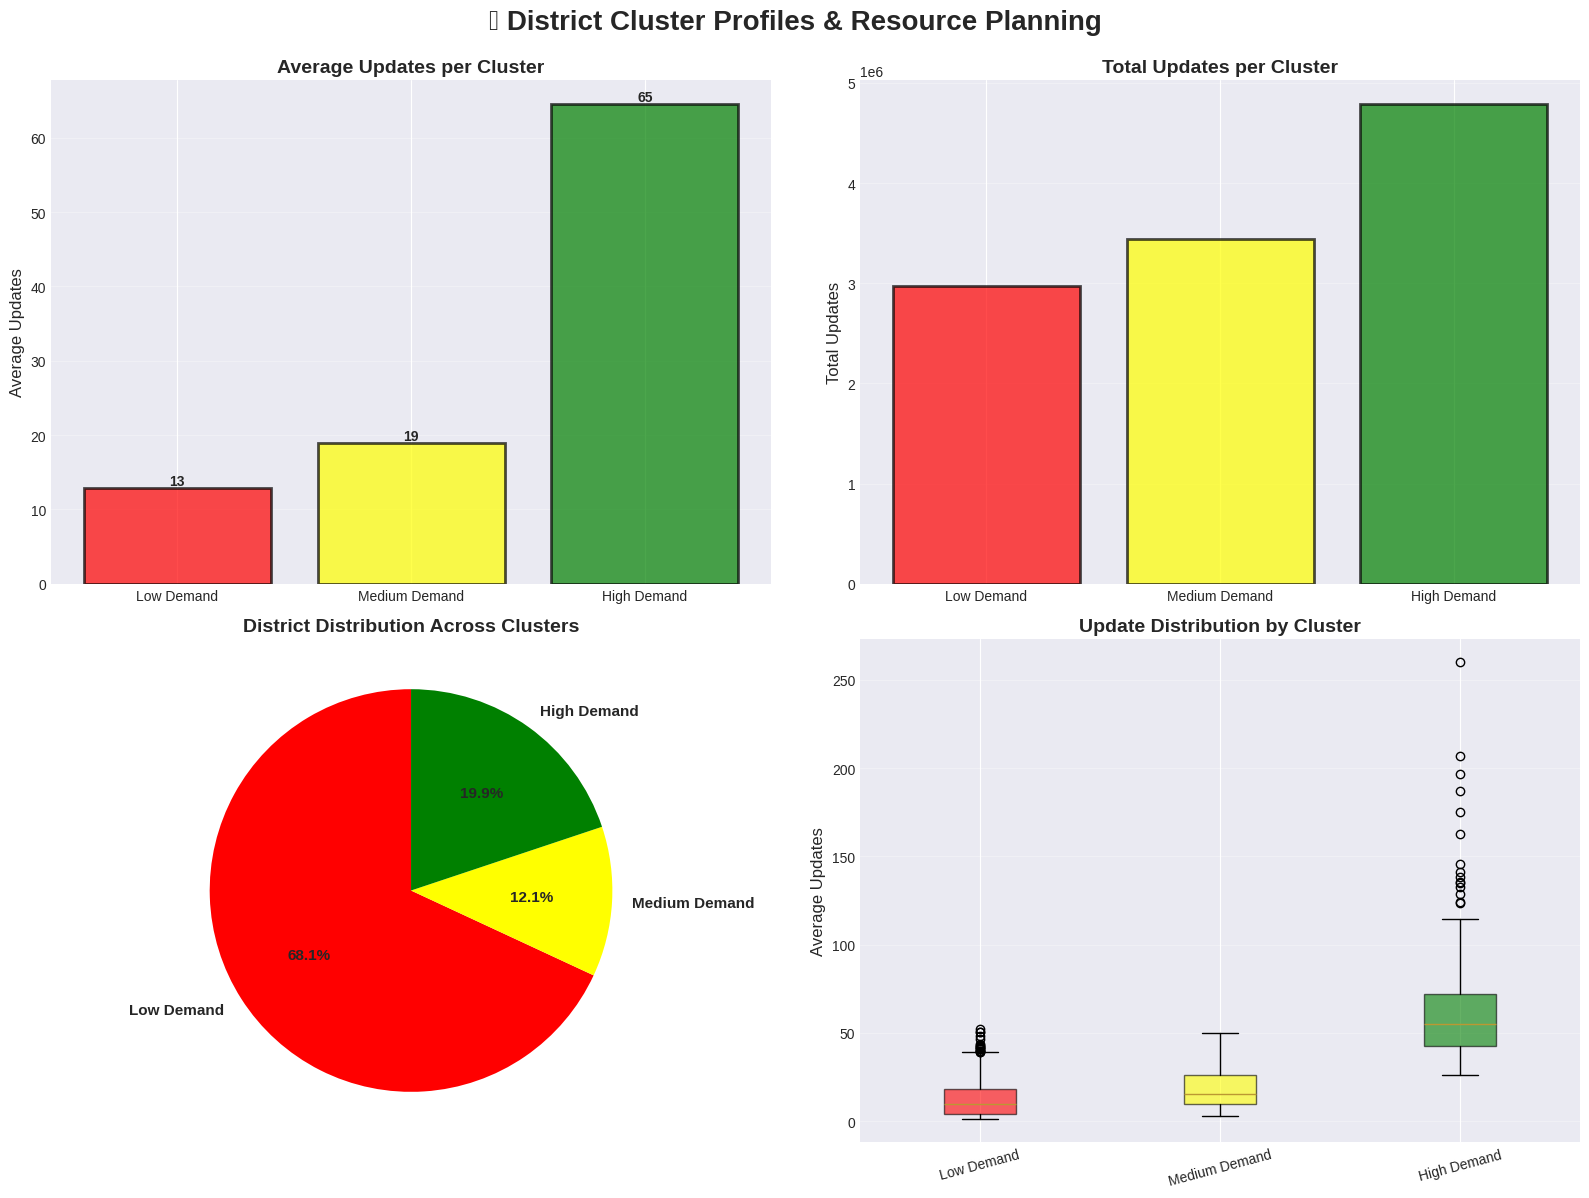

In [ ]:
# Detailed cluster profiles
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 District Cluster Profiles & Resource Planning', fontsize=20, fontweight='bold', y=0.995)

colors_list = ['red', 'yellow', 'green']

# Plot 1: Average Updates by Cluster
cluster_avg = district_demo.groupby('Cluster_Label')['Avg_Updates'].mean().sort_index()
axes[0, 0].bar(range(len(cluster_avg)), cluster_avg.values,
               color=colors_list, alpha=0.7, edgecolor='black', linewidth=2)
axes[0, 0].set_xticks(range(len(cluster_avg)))
axes[0, 0].set_xticklabels(labels)
axes[0, 0].set_title('Average Updates per Cluster', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Average Updates', fontsize=12)
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(cluster_avg.values):
    axes[0, 0].text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 2: Total Updates by Cluster
cluster_total = district_demo.groupby('Cluster_Label')['Total_Updates'].sum().sort_index()
axes[0, 1].bar(range(len(cluster_total)), cluster_total.values,
               color=colors_list, alpha=0.7, edgecolor='black', linewidth=2)
axes[0, 1].set_xticks(range(len(cluster_total)))
axes[0, 1].set_xticklabels(labels)
axes[0, 1].set_title('Total Updates per Cluster', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Total Updates', fontsize=12)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: District Count Distribution
cluster_count = district_demo['Cluster_Label'].value_counts().sort_index()
axes[1, 0].pie(cluster_count, labels=labels, autopct='%1.1f%%',
               colors=colors_list, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1, 0].set_title('District Distribution Across Clusters', fontsize=14, fontweight='bold')

# Plot 4: Box Plot - Update Distribution
cluster_data_list = [district_demo[district_demo['Cluster_Label'] == i]['Avg_Updates']
                     for i in range(n_clusters)]
box = axes[1, 1].boxplot(cluster_data_list, labels=labels, patch_artist=True)
for patch, color in zip(box['boxes'], colors_list):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
axes[1, 1].set_title('Update Distribution by Cluster', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Average Updates', fontsize=12)
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.savefig('visuals/clustering/cluster_profiles.png', dpi=300, bbox_inches='tight')
plt.show()

14.7 Cluster Recommendations

In [ ]:
print("\n" + "="*80)
print("💡 CLUSTER-BASED RESOURCE ALLOCATION RECOMMENDATIONS")
print("="*80)

recommendations = {
    0: {
        'name': '🔴 Low Demand Districts',
        'strategy': 'Minimal Resource Allocation',
        'actions': [
            '• Deploy mobile Aadhaar enrollment units',
            '• Conduct awareness campaigns',
            '• Partner with local government offices',
            '• Schedule periodic visits (monthly/quarterly)',
            '• Focus on rural outreach programs'
        ]
    },
    1: {
        'name': '🟡 Medium Demand Districts',
        'strategy': 'Standard Resource Allocation',
        'actions': [
            '• Maintain existing permanent centers',
            '• Regular monitoring and performance reviews',
            '• Staff training and capacity building',
            '• Balance between permanent and mobile units',
            '• Implement queue management systems'
        ]
    },
    2: {
        'name': '🟢 High Demand Districts',
        'strategy': 'Priority Resource Allocation',
        'actions': [
            '• Establish multiple permanent enrollment centers',
            '• Deploy additional staff and infrastructure',
            '• Implement advanced booking systems',
            '• Extend operating hours (evening/weekend slots)',
            '• Set up dedicated update centers',
            '• Fast-track approval processes'
        ]
    }
}

for cluster_id in range(n_clusters):
    cluster_districts = district_demo[district_demo['Cluster_Label'] == cluster_id]
    rec = recommendations[cluster_id]

    print(f"\n{rec['name']}")
    print(f"{'─' * 80}")
    print(f"Number of Districts: {len(cluster_districts)}")
    print(f"Average Updates: {cluster_districts['Avg_Updates'].mean():,.2f}")
    print(f"Total Updates: {cluster_districts['Total_Updates'].sum():,.0f}")
    print(f"\n🎯 Strategy: {rec['strategy']}")
    print(f"\n📋 Recommended Actions:")
    for action in rec['actions']:
        print(f"   {action}")

print("\n" + "="*80)


💡 CLUSTER-BASED RESOURCE ALLOCATION RECOMMENDATIONS

🔴 Low Demand Districts
────────────────────────────────────────────────────────────────────────────────
Number of Districts: 644
Average Updates: 12.86
Total Updates: 2,971,572

🎯 Strategy: Minimal Resource Allocation

📋 Recommended Actions:
   • Deploy mobile Aadhaar enrollment units
   • Conduct awareness campaigns
   • Partner with local government offices
   • Schedule periodic visits (monthly/quarterly)
   • Focus on rural outreach programs

🟡 Medium Demand Districts
────────────────────────────────────────────────────────────────────────────────
Number of Districts: 114
Average Updates: 18.89
Total Updates: 3,441,358

🎯 Strategy: Standard Resource Allocation

📋 Recommended Actions:
   • Maintain existing permanent centers
   • Regular monitoring and performance reviews
   • Staff training and capacity building
   • Balance between permanent and mobile units
   • Implement queue management systems

🟢 High Demand Districts
─────

14.8 Export Clustering Results

In [ ]:
# Export cluster data with labels
district_demo_export = district_demo.copy()
district_demo_export['Cluster_Name'] = district_demo_export['Cluster_Label'].map({
    0: 'Low Demand',
    1: 'Medium Demand',
    2: 'High Demand'
})

district_demo_export.to_csv('exports/district_clusters.csv', index=False)
cluster_stats.to_csv('exports/cluster_statistics.csv')

# Create summary report
cluster_summary = district_demo.groupby('Cluster_Label').agg({
    'district': 'count',
    'Total_Updates': 'sum',
    'Avg_Updates': 'mean',
    'Transaction_Count': 'sum'
}).round(2)
cluster_summary.columns = ['District_Count', 'Total_Updates', 'Avg_Updates', 'Total_Transactions']
cluster_summary.to_csv('exports/cluster_summary.csv')

print("\n✅ Clustering results exported:")
print("   📄 exports/district_clusters.csv - Full district data with cluster assignments")
print("   📄 exports/cluster_statistics.csv - Statistical summary by cluster")
print("   📄 exports/cluster_summary.csv - High-level cluster summary")


✅ Clustering results exported:
   📄 exports/district_clusters.csv - Full district data with cluster assignments
   📄 exports/cluster_statistics.csv - Statistical summary by cluster
   📄 exports/cluster_summary.csv - High-level cluster summary


15. **ADVANCED VISUALIZATIONS**

15.1 Interactive Time Series (Plotly)

In [ ]:
# Create interactive plot for enrolments
fig = px.line(
    enrol.groupby('date')['total_enrolment'].sum().reset_index(),
    x='date',
    y='total_enrolment',
    title='📈 Interactive Time Series: Daily Aadhaar Enrolments',
    labels={'date': 'Date', 'total_enrolment': 'Total Enrolments'}
)

fig.update_layout(
    hovermode='x unified',
    title_font_size=18,
    height=600,
    showlegend=False
)

fig.write_html('visuals/advanced/interactive_enrolment_timeseries.html')
print("✅ Interactive enrolment chart saved: visuals/advanced/interactive_enrolment_timeseries.html")
fig.show()

✅ Interactive enrolment chart saved: visuals/advanced/interactive_enrolment_timeseries.html


15.2 Animated State Performance Over Time

In [ ]:
# Prepare data for animation
state_yearly = enrol.groupby(['year', 'state'])['total_enrolment'].sum().reset_index()

# Get top 15 states
top_15_states = enrol.groupby('state')['total_enrolment'].sum().nlargest(15).index
state_yearly_top = state_yearly[state_yearly['state'].isin(top_15_states)]

# Create animated bar chart
fig = px.bar(
    state_yearly_top,
    x='state',
    y='total_enrolment',
    animation_frame='year',
    title='🎬 Animated State Performance Over Years (Top 15 States)',
    labels={'total_enrolment': 'Total Enrolments', 'state': 'State'},
    color='total_enrolment',
    color_continuous_scale='Viridis'
)

fig.update_layout(
    height=700,
    xaxis_tickangle=-45
)

fig.write_html('visuals/advanced/animated_state_performance.html')
print("✅ Animated state chart saved: visuals/advanced/animated_state_performance.html")
fig.show()

✅ Animated state chart saved: visuals/advanced/animated_state_performance.html


15.3 Correlation Analysis Dashboard

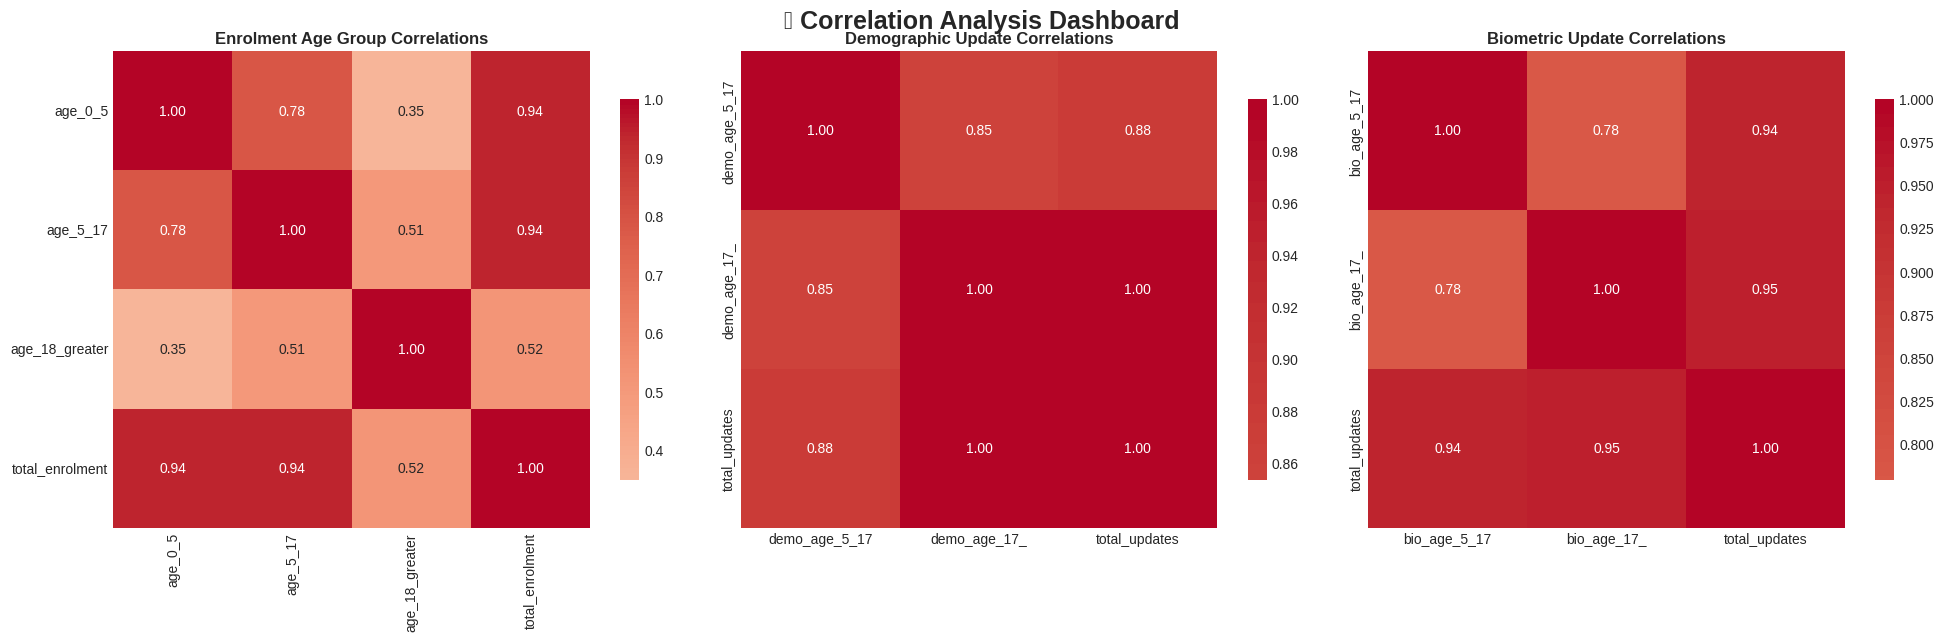

In [ ]:
# Create correlation matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('🔗 Correlation Analysis Dashboard', fontsize=18, fontweight='bold')

# Enrolment correlations
enrol_corr = enrol[['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrolment']].corr()
sns.heatmap(enrol_corr, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, ax=axes[0], cbar_kws={"shrink": 0.8})
axes[0].set_title('Enrolment Age Group Correlations', fontsize=12, fontweight='bold')

# Demographic correlations
demo_corr = demo[['demo_age_5_17', 'demo_age_17_', 'total_updates']].corr()
sns.heatmap(demo_corr, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, ax=axes[1], cbar_kws={"shrink": 0.8})
axes[1].set_title('Demographic Update Correlations', fontsize=12, fontweight='bold')

# Biometric correlations
bio_corr = bio[['bio_age_5_17', 'bio_age_17_', 'total_updates']].corr()
sns.heatmap(bio_corr, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, ax=axes[2], cbar_kws={"shrink": 0.8})
axes[2].set_title('Biometric Update Correlations', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('visuals/advanced/correlation_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

15.4 Distribution Analysis

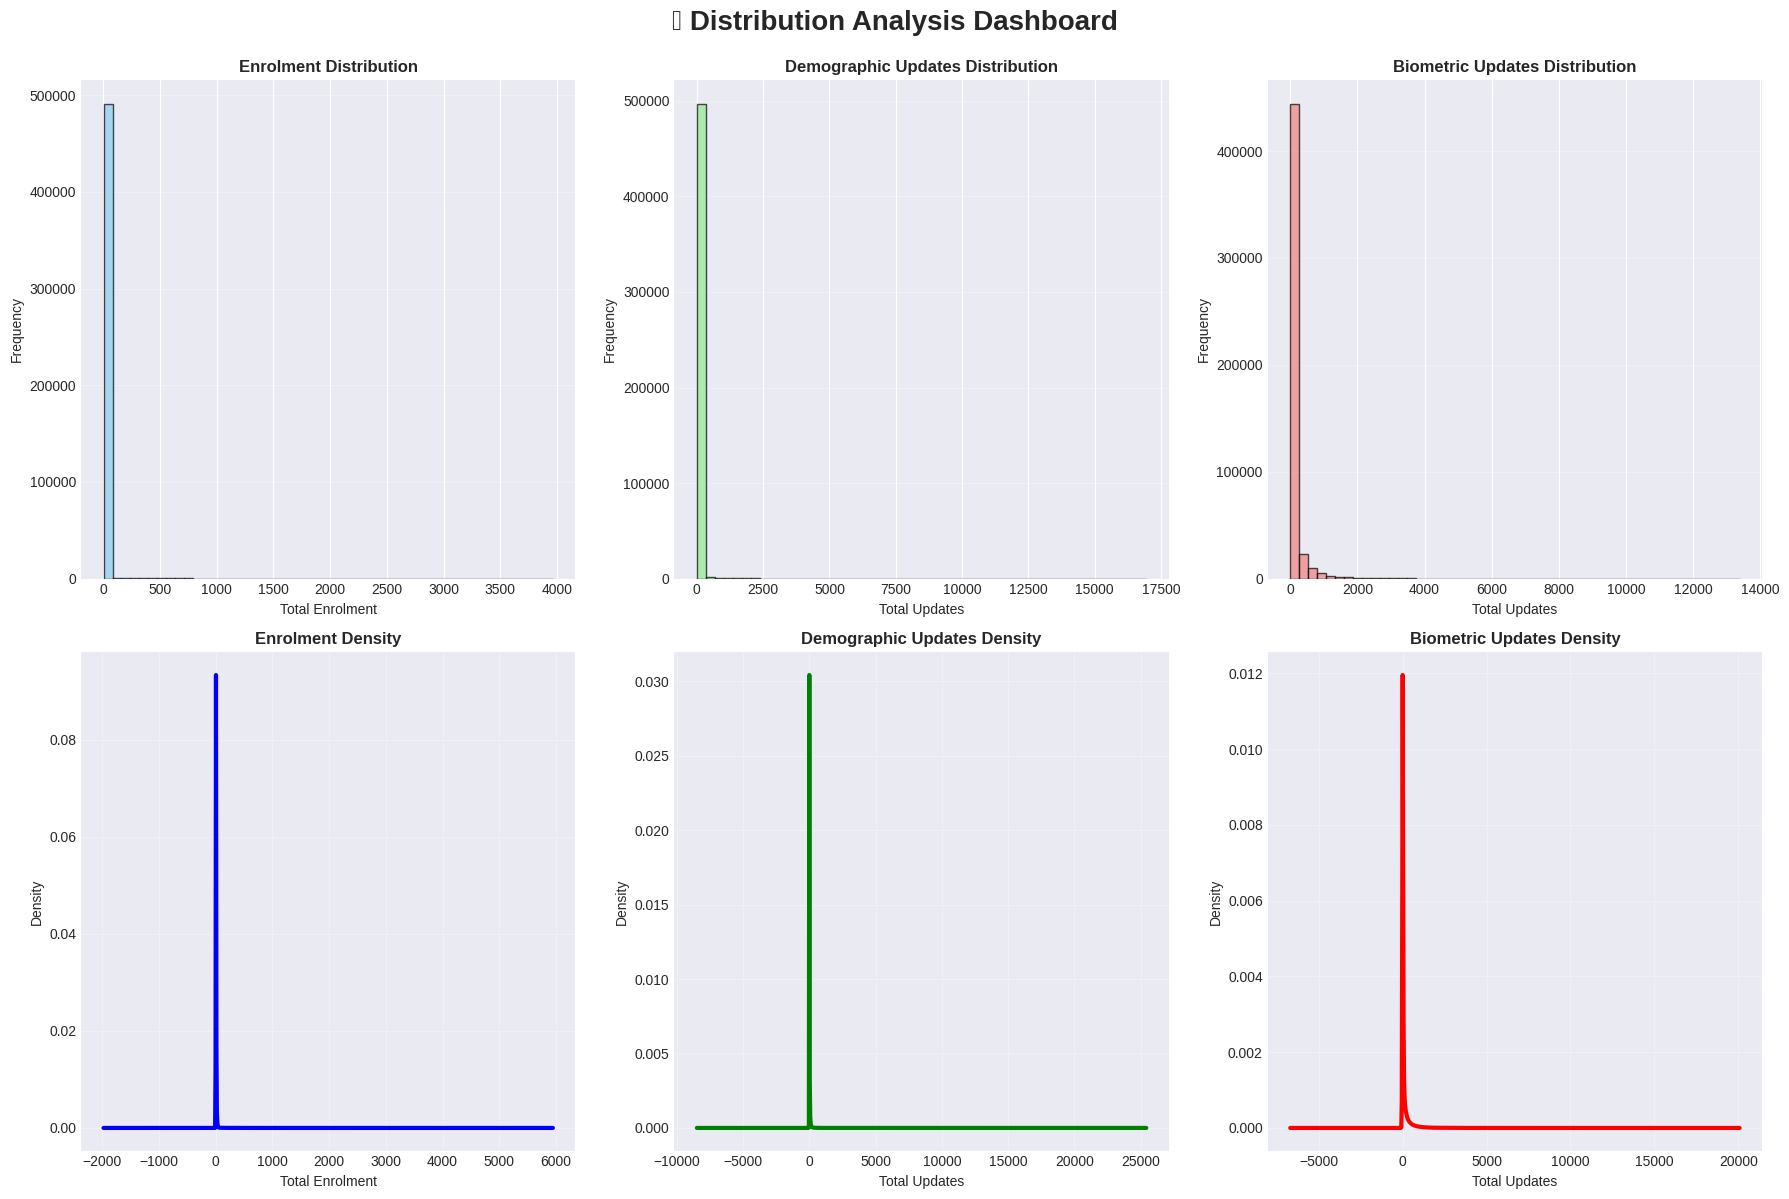

In [ ]:
# Distribution plots for key metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('📊 Distribution Analysis Dashboard', fontsize=20, fontweight='bold', y=0.995)

# Enrolment distribution
axes[0, 0].hist(enrol['total_enrolment'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Enrolment Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Total Enrolment')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Demographic updates distribution
axes[0, 1].hist(demo['total_updates'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Demographic Updates Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Total Updates')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Biometric updates distribution
axes[0, 2].hist(bio['total_updates'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Biometric Updates Distribution', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Total Updates')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].grid(True, alpha=0.3, axis='y')

# KDE plots
enrol['total_enrolment'].plot(kind='kde', ax=axes[1, 0], linewidth=3, color='blue')
axes[1, 0].set_title('Enrolment Density', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Total Enrolment')
axes[1, 0].grid(True, alpha=0.3)

demo['total_updates'].plot(kind='kde', ax=axes[1, 1], linewidth=3, color='green')
axes[1, 1].set_title('Demographic Updates Density', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Total Updates')
axes[1, 1].grid(True, alpha=0.3)

bio['total_updates'].plot(kind='kde', ax=axes[1, 2], linewidth=3, color='red')
axes[1, 2].set_title('Biometric Updates Density', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Total Updates')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('visuals/advanced/distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

15.5 Comprehensive Dashboard Summary

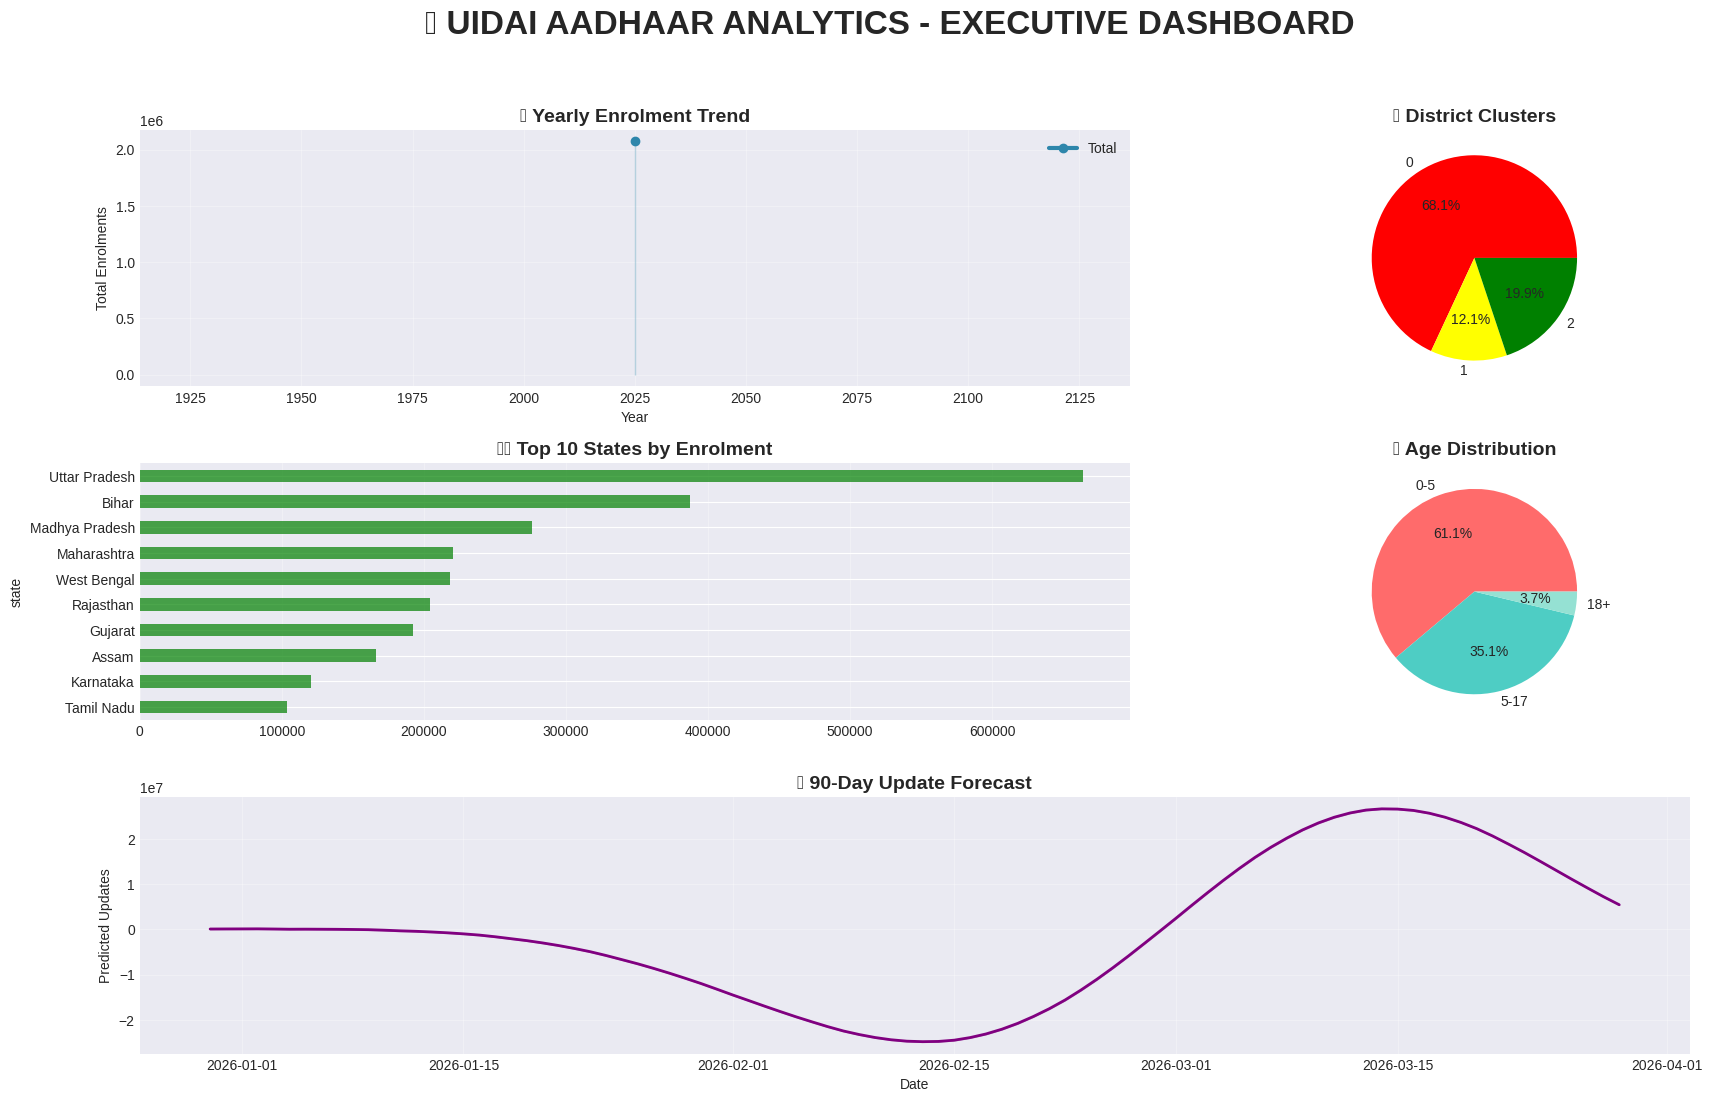


✅ Executive dashboard created: visuals/EXECUTIVE_DASHBOARD.png


In [ ]:
# Create final summary dashboard
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

fig.suptitle('🎯 UIDAI AADHAAR ANALYTICS - EXECUTIVE DASHBOARD',
             fontsize=24, fontweight='bold', y=0.98)

# 1. Yearly trend (large)
ax1 = fig.add_subplot(gs[0, :2])
yearly_enrol.plot(x='year', y='Total', ax=ax1, marker='o', linewidth=3, color='#2E86AB')
ax1.fill_between(yearly_enrol['year'], yearly_enrol['Total'], alpha=0.3, color='#2E86AB')
ax1.set_title('📈 Yearly Enrolment Trend', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Enrolments')

# 2. Cluster distribution (pie)
ax2 = fig.add_subplot(gs[0, 2])
district_demo['Cluster_Label'].value_counts().sort_index().plot(
    kind='pie', ax=ax2, autopct='%1.1f%%', colors=['red', 'yellow', 'green']
)
ax2.set_title('🎯 District Clusters', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

# 3. Top states (bar)
ax3 = fig.add_subplot(gs[1, :2])
top_10 = enrol.groupby('state')['total_enrolment'].sum().nlargest(10)
top_10.plot(kind='barh', ax=ax3, color='green', alpha=0.7)
ax3.set_title('🗺️ Top 10 States by Enrolment', fontsize=14, fontweight='bold')
ax3.invert_yaxis()
ax3.grid(True, alpha=0.3, axis='x')

# 4. Age distribution (pie)
ax4 = fig.add_subplot(gs[1, 2])
age_totals_list = [enrol['age_0_5'].sum(), enrol['age_5_17'].sum(), enrol['age_18_greater'].sum()]
ax4.pie(age_totals_list, labels=['0-5', '5-17', '18+'], autopct='%1.1f%%',
        colors=['#FF6B6B', '#4ECDC4', '#95E1D3'])
ax4.set_title('👥 Age Distribution', fontsize=14, fontweight='bold')

# 5. Forecast preview (large)
ax5 = fig.add_subplot(gs[2, :])
if 'forecast_demo' in locals():
    future_preview = forecast_demo[forecast_demo['ds'] > ts_data_demo['ds'].max()].head(90)
    ax5.plot(future_preview['ds'], future_preview['yhat'], linewidth=2, color='purple')
    ax5.fill_between(future_preview['ds'],
                     future_preview['yhat_lower'],
                     future_preview['yhat_upper'],
                     alpha=0.3, color='purple')
    ax5.set_title('🔮 90-Day Update Forecast', fontsize=14, fontweight='bold')
    ax5.grid(True, alpha=0.3)
    ax5.set_xlabel('Date')
    ax5.set_ylabel('Predicted Updates')

plt.savefig('visuals/EXECUTIVE_DASHBOARD.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Executive dashboard created: visuals/EXECUTIVE_DASHBOARD.png")

16. **ANALYSIS SUMMARY & KEY INSIGHTS**

In [ ]:
print("\n" + "="*80)
print("🎯 UIDAI AADHAAR ANALYTICS - COMPREHENSIVE SUMMARY")
print("="*80)

print("\n📊 DATA OVERVIEW:")
print(f"   Total Enrolment Records:     {len(enrol):,}")
print(f"   Total Demographic Updates:   {len(demo):,}")
print(f"   Total Biometric Updates:     {len(bio):,}")
print(f"   Total Records Analyzed:      {len(enrol) + len(demo) + len(bio):,}")

print("\n📈 KEY METRICS:")
print(f"   Total Enrolments:")
print(f"      - Age 0-5:       {enrol['age_0_5'].sum():,}")
print(f"      - Age 5-17:      {enrol['age_5_17'].sum():,}")
print(f"      - Age 18+:       {enrol['age_18_greater'].sum():,}")
print(f"      - TOTAL:         {enrol['total_enrolment'].sum():,}")
print(f"\n   Total Updates:")
print(f"      - Demographic:   {demo['total_updates'].sum():,}")
print(f"      - Biometric:     {bio['total_updates'].sum():,}")

print("\n🏆 TOP PERFORMERS:")
top_enrol_state = enrol.groupby('state')['total_enrolment'].sum().idxmax()
top_demo_state = demo.groupby('state')['total_updates'].sum().idxmax()
top_bio_state = bio.groupby('state')['total_updates'].sum().idxmax()

print(f"   Top State (Enrolment):       {top_enrol_state}")
print(f"   Top State (Demographic):     {top_demo_state}")
print(f"   Top State (Biometric):       {top_bio_state}")

print("\n🎯 CLUSTERING INSIGHTS:")
print(f"   Number of Clusters:          3 (Low/Medium/High Demand)")
print(f"   Districts Analyzed:          {len(district_demo)}")
for i in range(3):
    count = len(district_demo[district_demo['Cluster_Label'] == i])
    percentage = (count / len(district_demo)) * 100
    print(f"   Cluster {i} Districts:          {count} ({percentage:.1f}%)")

print("\n🔮 FORECAST HIGHLIGHTS:")
print(f"   Forecast Period:             180 days")
print(f"   Model Used:                  Facebook Prophet")
print(f"   Confidence Level:            95%")

print("\n📁 OUTPUTS GENERATED:")
import os
vis_count = sum([len(files) for r, d, files in os.walk('visuals')])
export_count = len([f for f in os.listdir('exports') if f.endswith('.csv')])
print(f"   Visualization Files:         {vis_count}")
print(f"   Data Export Files:           {export_count}")
print(f"   Interactive HTML Files:      2+")

print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE - ALL OUTPUTS SAVED")
print("="*80)


🎯 UIDAI AADHAAR ANALYTICS - COMPREHENSIVE SUMMARY

📊 DATA OVERVIEW:
   Total Enrolment Records:     493,964
   Total Demographic Updates:   500,000
   Total Biometric Updates:     489,682
   Total Records Analyzed:      1,483,646

📈 KEY METRICS:
   Total Enrolments:
      - Age 0-5:       2,001,557
      - Age 5-17:      1,149,853
      - Age 18+:       122,345
      - TOTAL:         3,273,755

   Total Updates:
      - Demographic:   11,199,483
      - Biometric:     48,585,568

🏆 TOP PERFORMERS:
   Top State (Enrolment):       Uttar Pradesh
   Top State (Demographic):     Uttar Pradesh
   Top State (Biometric):       Uttar Pradesh

🎯 CLUSTERING INSIGHTS:
   Number of Clusters:          3 (Low/Medium/High Demand)
   Districts Analyzed:          946
   Cluster 0 Districts:          644 (68.1%)
   Cluster 1 Districts:          114 (12.1%)
   Cluster 2 Districts:          188 (19.9%)

🔮 FORECAST HIGHLIGHTS:
   Forecast Period:             180 days
   Model Used:                  Faceboo

17. **Export Summary Report**

In [ ]:
# Create comprehensive summary report
summary_data = {
    'Metric': [
        'Total Enrolment Records',
        'Total Demographic Update Records',
        'Total Biometric Update Records',
        'Total Enrolments (All Ages)',
        'Total Demographic Updates',
        'Total Biometric Updates',
        'Number of States',
        'Number of Districts',
        'Analysis Start Date',
        'Analysis End Date',
        'Number of Clusters',
        'Forecast Days',
        'Report Generated'
    ],
    'Value': [
        f"{len(enrol):,}",
        f"{len(demo):,}",
        f"{len(bio):,}",
        f"{enrol['total_enrolment'].sum():,}",
        f"{demo['total_updates'].sum():,}",
        f"{bio['total_updates'].sum():,}",
        f"{enrol['state'].nunique()}",
        f"{enrol['district'].nunique()}",
        f"{enrol['date'].min()}",
        f"{enrol['date'].max()}",
        "3",
        "180",
        datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv('exports/analysis_summary_report.csv', index=False)

print("\n✅ Summary report exported: exports/analysis_summary_report.csv")
print("\n📊 Summary Report:")
display(summary_df)


✅ Summary report exported: exports/analysis_summary_report.csv

📊 Summary Report:


,Metric,Value
0,Total Enrolment Records,"493,964"
1,Total Demographic Update Records,"500,000"
2,Total Biometric Update Records,"489,682"
3,Total Enrolments (All Ages),"3,273,755"
4,Total Demographic Updates,"11,199,483"
5,Total Biometric Updates,"48,585,568"
6,Number of States,54
7,Number of Districts,971
8,Analysis Start Date,2025-01-04 00:00:00
9,Analysis End Date,2025-12-09 00:00:00
